# Sequential Sampling Modeling in HSSM
## Author: Nadja R. Ging-Jehli
## Last update: 05/04/24

Welcome! This script serves as your gateway to mastering sequential sampling models in cognitive neuroscience and computational psychiatry. Designed to streamline your journey, it offers a comprehensive setup for HSSM (Hierarchical Sequential Sampling Models). Dive into our 'Code Snippets' section, where commonly used functions are accompanied by concise explanations. Explore our tutorials, spanning a range of applications with HSSM, and gain insights into troubleshooting modeling issues along the way. Embark on your modeling adventure with confidence and precision!


# Introduction and Configuration

### Why HSSM Excites Me Personally

As a scientist in cognitive neuroscience and computational psychiatry, HSSM ignites my enthusiasm for three key reasons: <br>

**Expanded Modeling Capabilities:** HSSM broadens the modeling horizons beyond the traditional drift diffusion model (DDM) to encompass a spectrum of sequential sampling models (SSMs). Check out my blog on gingjehli.com for a brief overview on the similarities and differences among SSMs. O <br>
**Enhanced Functionalities:** Leveraging notations from Bambi (inspired by the lmer function in R's lme4 package), HSSM facilitates a familiar interface for implementing hierarchical models, enabling seamless integration of between- and within-subject variables. Dive into the short tutorials below for a firsthand experience. <br>
**Flexibility and Control:** With HSSM, I can craft bespoke priors, fix model parameters, and train custom models. <br>

**WARNING:**<br>
As often in life, with great flexibility comes also great responsibility. My aim is to equip you with a practical cookbook recipe to navigate the myriad possibilities effectively. Each tutorial follows a standardized procedure, beginning with data simulation and descriptive plotting—a methodology detailed in my blog posts on quantile-probability plots and interpreting model parameters' effects.

**Disclaimer:** <br>
There are also other great packages out there that I really like such as BRMS, DMC/EMC, fast-DM etc. In principle, I encourage everyone to explore multiple packages and to really understand the mechanics behind it. You don't want to make yourself independent from a particular package ;) 


### HSSM Basics

- ther models than the DDM are based on the approximate differentiable likelihood function that relies on JAX for likelihood computation. This is based on the LAN extension that was last introduced in HDDM and which you can read up on here: Fengler, A., Govindarajan, L. N., Chen, T., & Frank, M. J. (2021). Likelihood approximation networks (LANs) for fast inference of simulation models in cognitive neuroscience. Elife, 10, e65074.
- HSSM provides an interface to PyMC and other established python modules such as bambi and arviz.  
- to see a list of supported SSMs, type: "help(hssm.config)". Common SSMs that are already supported: ddm, ddm_sdv, angle, levy, ornstein (note: the current version is a slight deviation from the traditional ornstein-uhlenbeck model!), weibull, race_no_bias_angle_4.


**Requirement on data structure**
To ensure compatibility with HSSM, datasets should be provided as pandas DataFrames and include the following columns: 'rt' for response time, measured in seconds, and 'response' for binary responses, encoded as 1 for upper boundary and -1 for lower boundary (note the difference to HDDM where responses was provided as 1 and 0). Moreover, it's important to note that in HSSM, the default grouping variable is now participant_id, which differs from subj_idx used in HDDM. 

### Setting priors

When defining priors in Bayesian modeling, it’s essential to choose priors thoughtfully. Priors can significantly influence the results, especially in cases where data are limited or the model is complex. Here are some general pieces of advice for defining priors:

**1. Use Weakly Informative Priors:** 
Instead of using non-informative or flat priors (even if they are default!), it's often better to use weakly informative priors. These are priors that provide enough information to regularize the estimates, preventing unrealistic values without being too restrictive. For instance, if you know a parameter should be positive, you might use a half-normal or log-normal distribution with a reasonable scale parameter.

**2. Consider the Scale of Your Data:**
The priors should be appropriate for the scale of your data. For example, if you're working with standard scores (like z-scores), priors centered around zero with a small scale (e.g., normal(0, 1)) might be appropriate. For data measured in thousands or millions, you would adjust your priors accordingly.

**3. Check Prior Predictive Distributions:**
Before fitting your model to the data, check the prior predictive distributions. This involves simulating data from the priors alone and seeing if the generated data are plausible. This can help catch overly restrictive or overly broad priors.

**4. Avoid Overly Strong Priors Unless Justified:**
Strong priors can dominate the data, leading to posterior estimates that reflect the priors more than the data itself. Use strong priors only if you have high confidence in specific parameter values based on substantial previous research or theoretical considerations.

**5. Regularization Through Priors:** 
Especially in models with many parameters (like hierarchical models), using priors effectively can act as a form of regularization, helping to prevent overfitting and improve model performance.

**6. Sensitivity Analysis:** 
After choosing your priors and fitting your model, it's good practice to perform a sensitivity analysis. Change the priors slightly to see how much they affect the posterior estimates. This can give you confidence that your conclusions are robust to reasonable variations in the priors.

**7. Learn from Others:** 
Look at examples in the brms or Stan documentation and from academic papers where models similar to yours are used. Seeing what priors others have used can be instructive.

**8. Documentation and Justification:** 
Always document your choice of priors and provide justifications, especially if you are planning to publish your results. Transparently discussing why certain priors were chosen helps in the peer review process and aids readers in understanding your modeling decisions.


### General notes on regression-based models:
Generally, STAN uses the default prior on regression coefficients βk:

βk∼Normal(0,2.5⋅sy/sx), whereL
- sx=sd(x) and if family=gaussian(link),
- sx=1 otherwise.
This corresponds to prior = normal(0, 2.5, autoscale = TRUE)

**some useful links to decide on priors:** <br>
https://mc-stan.org/rstanarm/articles/priors.html#:~:text=For%20specifying%20priors%2C%20the%20stan_glm%20function%20accepts%20the,%2B%20am%2C%20data%20%3D%20mtcars%2C%20chains%20%3D%201%29 <br>

https://mc-stan.org/rstanarm/reference/priors.html <br>


**Default priors for preprogrammed SSMs in HSSM:** <br>
https://lnccbrown.github.io/HSSM/api/defaults/#model-ornstein


### General notes on regression-based modeling

- Built on top of bambi, HSSM uses an lmer-like syntax that makes it extremely straight-forward to specify regressions
- Parameters that are targets of regressions are also specified using dictionaries in include

- Instead of specifying priors for the parameter, the priors are now specified for the corresponding regression coefficients
- If not specified, HSSM will use default priors generated in Bambi
- The users might also want to specify a link function for generalized linear models. If left unspecified, the identity link function will be used.
- make sure that your coefficients for regression-based equations are z-scored
- Ensure that all parameters are on a similar scale to aid in effective auto-tuning of the sampler's step size. This practice can significantly improve sampling efficiency. Typically, we are z-scoring all covariates.

- Instead of specifying priors for the parameter, the priors are now specified for the corresponding regression coefficients
- If not specified, HSSM will use default priors generated in Bambi. Note that defining priors becomes now more important and you might wanna orient yourself on the established STAN user community (see links above).

**Using lme4 frequentist syntax for models within Bayesian frameworks:** <br>
Understanding the syntax and terminology used in defining models with HSSM (Bayesian Regression Models using PyMC) is crucial for effectively leveraging its modeling capabilities. In HSSM, models are expressed using a syntax similar to the traditional formula notation, where predictors are specified using a familiar syntax. However, the distinction between 'fixed' and 'random' effects can sometimes be confusing in the context of HSSM, as it operates within a Bayesian framework. Unlike frequentist approaches, where fixed effects represent parameters estimated with maximum likelihood methods and random effects account for variability due to groupings, BRMS treats all effects as random variables with prior distributions. This Bayesian approach allows for more flexible and robust modeling, but it may require a shift in mindset for users accustomed to frequentist methodologies.

**Defining link functions:** <br>
Link functions is another concept in frequentist generalized linear models, which defines a transformation between the linear combination of the covariates and the response variable. This is helpful especially when the response variable is not normally distributed, e.g. in a logistic regression. In HSSM, the link function is identity by default. However, since some parameters of SSMs are defined on (0, inf) or (0, 1), link function can be helpful in ensuring the result of the regression is defined for these parameters. 


**Defining uncorrelated random effects:** <br>
We are using the formulae package for design matrix construction via Bambi, and it looks like even in their docs it's not easy to figure out how the first model will exactly differ from the second in terms of the matrix constructed (or why matrix construction fails in the first case).
re standardization:
As far as I know (also just checked again), bambi will not standardize the predictors as a default, this is up to the user. We could add this as convenience functionality on the HSSM side.
If you look at the documentation https://bambinos.github.io/formulae/notebooks/getting_started.html#User-guide you can use the scale() function inside your regression to standardize your variables at the point of design matrix construction.


### Details on Regression-based notation

The lme4 notation provides a flexible and intuitive syntax for specifying Bayesian regression models. Let's break down the notation for the equation 1 + x * y + (1 + x * y | participant_id): <br>

- The constant term 1 represents the intercept of the model. By default, the intercept is included even when not explicitly specified. If you wish to exclude it, you can specify 0 or -1. <br> 
- The syntax x * y represents an interaction term between variables x and y. This is equivalent to specifying both the main effects (x and y) and their interaction (x:y).<br> 
- Including main effects alongside the interaction term is standard practice in regression-based models. Omitting main effects can lead to biased estimates and incorrect interpretations. Thus, it's essential to include both the main effects (x, y) and their interaction (x:y). As a rule of thumb: It's okay to only include main effects but it's typically not okay to only include interactions.<br> 
- The equation is divided into two parts: the first part before the brackets defines what are referred to as 'fixed effects' in frequentist approaches. These are the parameters that have fixed values across observations and are estimated from the data. The part inside the brackets defines what are referred to as 'random effects.' These are parameters that vary randomly across different groups or levels of a grouping variable (e.g., participant_id). Including random effects allows for the modeling of individual variation within groups and accounts for correlations among observations within the same group. <br>
<br>

**IMPORTANT:** <br>
In a Bayesian setting, the distinction between fixed and random effects becomes less clear and potentially misleading due to the fundamental differences in the underlying statistical framework. For details, refer to my blog (gingjehli.com).

In a Bayesian framework, the equation "v ~ 1 + x + y + x:y + (1 + x + y + x:y | participant_id)" represents a hierarchical regression model where parameters are treated as random variables with probability distributions. Let's break it down without using the terms "fixed" and "random effects":

- Response Variable (v): This is the variable we aim to model or predict. It's the dependent variable in the regression model.

**Hierarchical Structure:**
- The model includes a hierarchical structure, indicated by the grouping variable participant_id. This implies that the data are clustered or nested within different levels of participant_id, and we want to model variability at both the individual level and the group level. <br> 

**Parameter Specification:**
- The intercept term (1) represents the expected value of v when all predictors are zero.
- The terms x and y represent the individual effects of predictors x and y on the response variable v.
- The term x:y represents the interaction between predictors x and y, capturing their combined effect on v.
- Parameters associated with these terms are treated as random variables with probability distributions.

**Random Variation Across Groups:**
- Within each level of participant_id, there is variability in the intercept (1), the effects of x and y, and their interaction (x:y). The model allows for this variability by specifying random intercepts and slopes for x and y, as well as their interaction, within each level of participant_id. <br>

In summary, the equation represents a hierarchical Bayesian regression model where the response variable v is modeled as a function of predictors x and y, along with their interaction, while accounting for variability both within individual observations and across different levels of the grouping variable participant_id. The model captures uncertainty in parameter estimates by treating them as random variables with probability distributions, allowing for flexible modeling of complex data structures.

# Installing HSSM

Installation of HSSM should be simpler than HDDM because it's now available through PyPI.
So, simply use the code below.
There are other options that you can use if you encounter problems.
Here is more information about this: 
https://lnccbrown.github.io/HSSM/getting_started/installation/

In [33]:
# pip install hssm

## Alternatively, you can also download the bleeding edge version that's currently under development: 
# pip install git+https://github.com/lnccbrown/HSSM.git

# After Installation

## Import packages

In [3]:
# Import modules
import numpy as np
import matplotlib as plt
import pandas as pd

import hddm_wfpt
# import os
import matplotlib as plt
plt.use('Agg')
import arviz as az
import bambi as bmb

# from patsy import dmatrix
import pathlib
import pytensor

import hssm
import ssms
from ssms.basic_simulators import simulator


from jax.config import config
config.update("jax_enable_x64", False)


%matplotlib inline
%config InlineBackend.figure_format='retina'

hssm.set_floatX("float32")

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
/users/ngingje1/.conda/envs/pyHSSM/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Setting PyTensor floatX type to float32.
Setting "jax_enable_x64" to False. If this is not intended, please set `jax` to False.


## Check latest hssm version & proper installment

For now, you might to repatedly check for version updates since the development is ongoing and the modules are relatively new. The code below shows you the installed version.

In [4]:
### important because new features are continuously added
print(hssm.__version__)

## to check whether stuff got properly installed:
try:
    import ssms
    print("ssms module is installed.")
except ImportError:
    print("ssms module is not installed.")

0.2.0
ssms module is installed.


## Check the different functions in a module in ssms

Because HSSM is under active development, you can use the code below to quickly get an overview of the different functions available in each module. They are continuously updated over time. <br>

**Python language: modules vs. objects vs. attributes:**
In Python, HSSM refers to a module, serving as a blueprint or container for related functions and data. When we use hssm (lowercase), we're referring to an object created from the HSSM module. This hssm object holds specific data and functionality defined within the HSSM module. An attribute, on the other hand, is a piece of information associated with an object. It can be thought of as a variable that belongs to the object, defining its state or characteristics. For instance, in the context of HSSM, attributes might include parameters like p_outlier, which hold specific values for each hssm object created.

In [32]:
help(ssms)
help(hssm.plotting)
help(hssm.config)

Help on package ssms:

NAME
    ssms - # import importlib.metadata

PACKAGE CONTENTS
    basic_simulators (package)
    config (package)
    dataset_generators (package)
    support_utils (package)

DATA
    __all__ = ['basic_simulators', 'dataset_generators', 'config', 'suppor...

VERSION
    0.6.1

FILE
    /users/ngingje1/.conda/envs/pyHSSM/lib/python3.11/site-packages/ssms/__init__.py


Help on package hssm.plotting in hssm:

NAME
    hssm.plotting - Plotting functionalities for HSSM.

PACKAGE CONTENTS
    posterior_predictive
    quantile_probability
    utils

FUNCTIONS
    plot_posterior_predictive(model, idata: arviz.data.inference_data.InferenceData | None = None, data: pandas.core.frame.DataFrame | None = None, plot_data: bool = True, n_samples: int | float | None = 20, row: str | None = None, col: str | None = None, col_wrap: int | None = None, groups: Union[str, Iterable[str], NoneType] = None, groups_order: Union[Iterable[str], dict[str, Iterable[str]], NoneType] = None, b

# Code Snippets for Everyday Use

In this section, you'll discover a curated collection of code snippets tailored for practical application with the HSSM package. These snippets address common tasks and workflows, offering succinct solutions to streamline your modeling endeavors. While serving as quick references for specific tasks, comprehensive tutorials exploring various examples of between- and within-subject testing are elaborated in the dedicated section below titled "Tutorials." Dive deeper into these tutorials for a thorough understanding of HSSM's capabilities and applications.

### Data simulations

There are two main alternatives for simulating data with HSSM. Alternative 1 generates simulated data as arrays, while Alternative 2 generates simulated data as a pandas DataFrame. If your intention is to directly utilize the simulated data within HSSM, I recommend using Alternative 2. <br>

To simulate data, begin by specifying the model parameters you wish to use. Then, employ the simulator function to generate the DataFrame containing the simulated data. Subsequently, you can utilize this data to fit a model and assess whether you can accurately recover the parameters initially used for data simulation. This process is commonly referred to as parameter recovery studies.


#### Alternative 1
this will output the simulated data as arrays

In [5]:

from ssms.basic_simulators import simulator
import numpy as np
import pandas as pd

# Specify parameters
v_true, a_true, z_true, t_true = [0.5, 1.5, 0.5, 0.2]


# Simulate data
sim_out = simulator.simulator(
    theta=[v_true, a_true, z_true, t_true],  # parameter list
    model="ddm",  # specify model (many are included in ssms)
    n_samples=500,  # number of samples for each set of parameters
)
sim_out

{'rts': array([[0.48960143],
        [4.8755207 ],
        [1.9954203 ],
        [1.5139925 ],
        [1.2957997 ],
        [5.270444  ],
        [0.7686078 ],
        [0.98513615],
        [3.0608547 ],
        [0.6573879 ],
        [1.1781216 ],
        [5.5828047 ],
        [2.1878495 ],
        [0.716314  ],
        [6.3452473 ],
        [1.2961348 ],
        [0.6690389 ],
        [0.975559  ],
        [0.7956289 ],
        [1.218352  ],
        [1.1614165 ],
        [1.3967335 ],
        [1.212448  ],
        [2.4896853 ],
        [1.4449632 ],
        [2.7434018 ],
        [2.894457  ],
        [1.5950491 ],
        [0.9699237 ],
        [1.4439394 ],
        [2.5243657 ],
        [0.74107635],
        [2.20799   ],
        [2.7897735 ],
        [3.04847   ],
        [5.037988  ],
        [2.6643758 ],
        [1.1696538 ],
        [1.3273926 ],
        [2.490506  ],
        [3.1825488 ],
        [0.555652  ],
        [4.8354774 ],
        [2.2933905 ],
        [3.7141461 ],
   

#### Alternative 2
this will output the simulated data as a dataframe (desired object for HSSM)

In [ ]:
# Specify parameters
v_true, a_true, z_true, t_true = [0.5, 1.5, 0.5, 0.2]
# Simulate data
sim_out = hssm.simulate_data(
    theta=[v_true, a_true, z_true, t_true],  # parameter list
    model="ddm",  # specify model (many are included in ssms)
    size=100,  # number of samples for each set of parameters
)
sim_out

### Specifying priors

Suggestion (for beginners): To define priors, choose one notation form from below and then stick to it until you have a good handle and modeling practice using this package.


In [ ]:
## option 1
hssm.Param(
    "v",
    prior=dict(name="Uniform", upper=-5.0, lower=5.0), #note: always capitalize the name of the distribution
    bounds=(-10.0, 10.0) 
    # bounds=(0, np.inf),
)

## option 2
dict(name="Normal", mu=0.0, sigma=1.0) #this is a normal without explicit bounds

## option 3
hssm.Prior("Normal", mu=0.0, sigma=1.0) # This is exactly how you would specify priors using bambi

## option 4
param_v = {"name": "v", "prior": hssm.Prior("Normal", mu=0.0, sigma=1.0)}



### Fixing model parameters

You can now fix model parameters to certain values (a main difference in HSSM compared to HDDM). Below are examples where we fix drift rate (v) and nondecision time (t) to a value of 0.5

In [ ]:
param_v = {"name": "v", "prior": 0.5}
param_t = {"name": "t", "prior": 0.5}

### Specifying fixed- and random-effect terms

Reminders:
- (1 |participant_id): This defines a random intercept model. It estimates a separate intercept for each participant.
- "x + y + x:y": defines the 'fixed effect' terms, which represent the main predictors of interest. These terms estimate the average relationship between the intercept and coefficients on the outcome variable 'v' across all subjects. Specifically, 'x' and 'y' represent the main effects of predictors, while 'x:y' represents their interaction effect. Together, these terms capture how changes in 'x' and 'y' individually, as well as their interaction, influence the outcome 'v' across the entire dataset.
- (1 + x + y + x:y |participant_id): it estimates the relationship between intercept and coefficients on v for each subject separately. You do this to account that trials are nested within participant. 

In [ ]:
# The following code are equivalent,
# including the definition of the formula.

# The dictionary way:
param_v = {
    "name": "v",
    "formula": "v ~  1 + x + y + x:y + (1 + x + y + x:y |participant_id)",
    "link": "identity",
    "prior": {
        "Intercept": {"name": "Normal", "mu": 0.0, "sigma": 0.25},
        "1|participant_id": {"name": "Normal","mu": 0.0,"sigma": {"name": "HalfNormal", "sigma": 0.2},},  # this is a hyperprior
        "x": {"name": "Normal", "mu": 0.0, "sigma": 0.25},
    },
}

# The object-oriented way
param_v = hssm.Param(
    "v",
    formula="v ~ 1 + (1|participant_id) + x*y",
    link="identity",
    prior={
        "Intercept": hssm.Prior("Normal", mu=0.0, sigma=0.25),
        "1|participant_id": hssm.Prior("Normal", mu=0.0, sigma=hssm.Prior("HalfNormal", sigma=0.2),), # this is a hyperprior
        "x": hssm.Prior("Normal", mu=0.0, sigma=0.25),
    },
)


### Saving objects

In [ ]:
# save model
az.to_netcdf(infer_test,'sample_trace_infer_test.nc4') # (outdir+'summary_infer_test.csv')

# diagnostic plots
az.plot_trace(
    infer_test,
    var_names="~log_likelihood",  # we exclude the log_likelihood traces here
)
plt.savefig('posterior_diagnostic5000_10000_infer_test.png')

# fit summary
res_sum=az.summary(infer_test)
res_sum.to_csv('summary_infer_test.csv')

### Extract graphical figures

There is a figsize argument that you can provide to specify the width and height of the graph. 
For other options, you can refer to the bambi tutorial for more available options. 
We don't recommend pm.model_to_graphviz() since there are other processing that we have included in model.graph().

In [ ]:
import pymc as pm
import graphviz
import seaborn as sns
import matplotlib.pyplot as plt

# Set the default figure size
sns.set(rc={'figure.figsize':(0.25, 0.25)})

# Now call your graph function
graph = model_test.graph()
graph

# Save and render the graph to a PDF or any other supported file type
#graph.render(filename='model_graph', format='pdf', view=True)

# Visualize the graph within the Jupyter Notebook
#graph = pm.model_to_graphviz(model_test)
#graph

### Posterior predictive checks
I strongly suggest to use quantile probability plots to perform posterior predictive checks (see Tutorial 1). 
You can find a separate tutorial and example code here: https://github.com/gingjehli/HDDM---Detailed-PPC
There is also some in-build functions in the works (I haven't tested them yet).
**Important:**
The current example about quantile-probability plots on the HSSM webpage looks weird. I myself don't trust it (update: 05/04/24)

In [ ]:
# ddm_model.plot_posterior_predictive()

### Instantiate an object of the HSSM class & setting model attributes: "prior_setting", "link_settings", "loglik_kind"

bambi is not designed with HSSM in mind. Therefore, in cases where priors for certain parameters are not defined, the default priors supplied by bambi sometimes are not optimal. The same goes for link functions. "identity" link functions tend not to work well for certain parameters that are not defined on (inf, inf). Therefore, HSSM provides also some default settings that the users can experiment to ensure that sampling is successful.<br>

HSSM also provide a link_settings switch, which changes default link functions for parameters according to their explicit bounds.

In [47]:
model_default = hssm.HSSM(
    data=sim_out, 
    #hierarchical=True, # to use this: you will need to provide a column labeled as "participant_id" in your dataframe
    prior_settings="safe", # prior_settings=None,
    link_settings="log_logit",
    loglik_kind="approx_differentiable",
                              )
model_default

Hierarchical Sequential Sampling Model
Model: ddm

Response variable: rt,response
Likelihood: approx_differentiable
Observations: 100

Parameters:

v:
    Prior: Uniform(lower: -3.0, upper: 3.0)
    Explicit bounds: (-3.0, 3.0)
a:
    Prior: Uniform(lower: 0.30000001192092896, upper: 2.5)
    Explicit bounds: (0.3, 2.5)
z:
    Prior: Uniform(lower: 0.0, upper: 1.0)
    Explicit bounds: (0.0, 1.0)
t:
    Prior: Uniform(lower: 0.0, upper: 2.0)
    Explicit bounds: (0.0, 2.0)

Lapse probability: 0.05
Lapse distribution: Uniform(lower: 0.0, upper: 10.0)

Below you can compare the priors if you don't choose the safe prior_setting option. You can also see how to access a list of other attributes

In [51]:
## Instantiate an object of the HSSM class
hssm_object = hssm.HSSM(data=sim_out, model='ddm')

## Accessing attributes
model_type = hssm_object.model
model_type

## Accessing other attributes
# lapse_prior = hssm_object.lapse
# p_outlier_value = hssm_object.p_outlier
# hierarchical_flag = hssm_object.hierarchical

## You can also access and modify attributes directly
# hssm_object.p_outlier = 0.1  # Modifying the value of p_outlier

       Formula: c(rt, response) ~ 1
        Family: SSM Family
          Link: v = identity
  Observations: 100
        Priors: 
    target = v
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 2.0)
        
        Auxiliary parameters
            t ~ HalfNormal(sigma: 2.0, initval: 0.10000000149011612)
            z ~ Uniform(lower: 0.0, upper: 1.0)
            p_outlier ~ 0.05
            a ~ HalfNormal(sigma: 2.0)

# Tutorials

In this section, I explore a range of examples illustrating various within- and between-subject designs. These examples aim to provide you with a practical understanding of how to formulate regression-based models for Sequential Sampling Models (SSMs), offering insight into their application across different experimental setups. Each tutorial in this section follows a consistent sequence of steps, serving as a structured framework to ensure completeness and accuracy in your modeling process. <br>

**General cooking recipe for modeling:** <br>

**Step 1. Simulating Data:** In the initial step, we simulate data according to the desired data structure for our analysis.<br>
**Step 2. Model Definition:** Next, we define the Bayesian regression model, specifying the parameters to be estimated and formulating regression equations to describe them. This includes assigning appropriate prior distributions to the model parameters.<br>
**Step 3. Sampling from the Posterior Distribution:** In this critical step, we employ Markov Chain Monte Carlo (MCMC) methods to sample from the posterior distribution of the model parameters. We must specify the MCMC sampler, along with parameters such as chain length and burn-in period, to ensure effective sampling from the posterior distribution.<br>
**Step 4. Convergence Checks:** Following posterior sampling, we assess the convergence of the MCMC chains using diagnostic tests such as the Gelman-Rubin statistic (Rhat) and trace plots. These checks help ensure that the MCMC sampler has adequately explored the parameter space and reached convergence.<br>
**Step 5. Posterior Predictive Checks:** Utilizing the estimated parameters from the model, we perform posterior predictive checks by simulating data based on these estimates. We compare the simulated data to the observed empirical data, ideally using quantile-probability plots for detailed analysis. These plots provide insights into the fit of the model across various aspects of the data distribution, helping identify areas of potential misfit. For details, see my blog on my webpage.<br>
**Model Refinement:** Finally, armed with insights from the posterior predictive checks, we can iteratively refine the model as needed, revisiting the model specification and prior distributions to address any identified shortcomings. This iterative process enhances the robustness and validity of the Bayesian regression model.<br>
**Step 7. Model Inference:** After confirming model convergence and selecting the most suitable version based on data fit, we proceed to interpret the models. This involves conducting hypothesis tests, exploring significant effects of task conditions and between-group differences, and performing additional post-hoc analyses. A dedicated tutorial will be provided later for a detailed exploration of this step.<br>


## Tutorial 1: Classical DDM with basic setup

In this tutorial, we are going to use a very simple DDM with the four main model parameters. We will just look at the data of one participant so that we don't have to care about any hierarchical levels yet. If you see that mean RT for correct responses do not equal mean RT for error responses, you might want to consider variability parameters. For details, refer to my blogs on my webpage.

### Step 1: data simulation

In [34]:
# define model parameters for data simulation:
v_true, a_true, z_true, t_true = [0.5, 1.5, 0.5, 0.5]

# simulate data:
dataset = hssm.simulate_data(
    model="ddm",
    theta=[v_true, a_true, z_true, t_true],
    size=1000,
)
dataset

rt  response
0    1.445885      -1.0
1    5.338171       1.0
2    2.151869      -1.0
3    2.166013      -1.0
4    2.009228       1.0
..        ...       ...
995  6.085275       1.0
996  4.000053       1.0
997  3.686624       1.0
998  2.356743       1.0
999  0.744364       1.0

[1000 rows x 2 columns]

In [49]:
# Instantiate an object of the HSSM class
hssm_object = hssm.hssm.HSSM(data=dataset, model='ddm')
model_type = hssm_object.model
model_type

       Formula: c(rt, response) ~ 1
        Family: SSM Family
          Link: v = identity
  Observations: 1000
        Priors: 
    target = v
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 2.0)
        
        Auxiliary parameters
            t ~ HalfNormal(sigma: 2.0, initval: 0.10000000149011612)
            z ~ Uniform(lower: 0.0, upper: 1.0)
            p_outlier ~ 0.05
            a ~ HalfNormal(sigma: 2.0)

### Step 2: Define your model and priors

- to specify your model, do first descriptive analyses (see lecture slide: quantile-probability plots)
- in HSSM: you can rely on a basic setup without specifying the model (example 1) or you can specify the model yourself (example 2). 

- ALWAYS DEFINE YOUR PRIORS YOURSELF! 
-- but check how the community (particularly STAN & BRMS are doing it):
https://mc-stan.org/rstanarm/articles/priors.html#:~:text=For%20specifying%20priors%2C%20the%20stan_glm%20function%20accepts%20the,%2B%20am%2C%20data%20%3D%20mtcars%2C%20chains%20%3D%201%29
- lapse distributions are enabled by default, with the parameter p_outlier fixed at 0.05. If desired, you can disable lapse distributions by setting p_outlier to 0 or None.

In [8]:
# Example 1: just use all default options
simple_ddm_model_ex1 = hssm.HSSM(data=datase)
print(simple_ddm_model_ex1)

Hierarchical Sequential Sampling Model
Model: ddm

Response variable: rt,response
Likelihood: analytical
Observations: 1000

Parameters:

v:
    Prior: Normal(mu: 0.0, sigma: 2.0)
    Explicit bounds: (-inf, inf)
a:
    Prior: HalfNormal(sigma: 2.0)
    Explicit bounds: (0.0, inf)
z:
    Prior: Uniform(lower: 0.0, upper: 1.0)
    Explicit bounds: (0.0, 1.0)
t:
    Prior: HalfNormal(sigma: 2.0, initval: 0.10000000149011612)
    Explicit bounds: (0.0, inf)

Lapse probability: 0.05
Lapse distribution: Uniform(lower: 0.0, upper: 10.0)


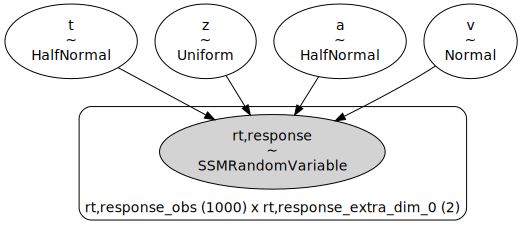

In [9]:
# Example 2: by plotting the graphical representation of the model
simple_ddm_model_ex1.graph()

In [13]:
### Example 3: specify your own model:

param_v = { "name": "v", "prior": {"name": "Normal","mu": 0.0,"sigma": 2.0,},}

# A Uniform prior for `a`. Using the `dict` function
param_a = hssm.Param("a", prior=dict(name="Uniform",lower=0.01,upper=5,),bounds=(0, np.inf),) 

# A Uniform prior for `z` over (0, 1) set using hssm.Prior. bounds are not set, existing default bounds will be used
param_z = {"name": "z", "prior": hssm.Prior("Uniform", lower=0.0, upper=1.0)}

# A fixed value for t
param_t = {"name": "t", "prior": 0.5}

simple_ddm_model_ex2 = hssm.HSSM(
    data=dataset,
    model="ddm",
    include=[
        param_v,
        param_a,
        param_z,
        param_t,
    ],
)
simple_ddm_model_ex2

Hierarchical Sequential Sampling Model
Model: ddm

Response variable: rt,response
Likelihood: analytical
Observations: 1000

Parameters:

v:
    Prior: Normal(mu: 0.0, sigma: 2.0)
    Explicit bounds: (-inf, inf)
a:
    Prior: Uniform(lower: 0.009999999776482582, upper: 5.0)
    Explicit bounds: (0, inf)
z:
    Prior: Uniform(lower: 0.0, upper: 1.0)
    Explicit bounds: (0.0, 1.0)
t:
    Prior: 0.5
    Explicit bounds: (0.0, inf)

Lapse probability: 0.05
Lapse distribution: Uniform(lower: 0.0, upper: 10.0)

### Step 3: Sampling from the Posterior Distribution (Model fitting)

Practical Information:
- The sample() method internally calls Bambi's fit() method, which in turn calls PyMC's sample() function to perform Markov Chain Monte Carlo (MCMC) sampling. While NUTS is the default sampler in HSSM, alternative samplers may be more suitable for specific models or datasets. Experimenting with different samplers can help optimize sampling efficiency and convergence.
- use multiple chains for sampling (typically 3, as recommended in lecture slides) to ensure robust estimation.
- Adequate warm-up (burn-in which is the more general Bayesian term and in HSSM we call it "tune") periods are crucial, allowing the algorithm sufficient iterations to explore the parameter space effectively.
- Chain Initialization: Proper initialization of chains can impact sampling efficiency and convergence. Initializing chains from different starting points or using advanced initialization techniques like the "adapt_diag" option in NUTS can improve sampling performance.
- The argument idata_kwargs=dict(log_likelihood=True) is set to true for models with a likelihood, such as the DDM. For more complex models like angle and Ornstein-Uhlenbeck models (OUM), this value is set to False, as demonstrated in later tutorials.


Background Information:
- Similar to PyMC, HSSM provides the sample() method for MCMC sampling once the model is defined.
- By default, HSSM uses PyMC's No-U-Turn Sampler (NUTS). However, alternative samplers can be utilized as well (examples provided below).


In [14]:
#### Start sampling process:
samples_ex2 = simple_ddm_model_ex2.sample(
    sampler="nuts_numpyro",  # type of sampler to choose, 'nuts_numpyro', 'nuts_blackjax' of default pymc nuts sampler
    cores=1,  # how many cores to use
    chains=3,  # how many chains to run
    draws=1000,  # number of draws from the markov chain
    tune=500,  # number of burn-in samples
    idata_kwargs=dict(log_likelihood=True),  # return log likelihood
    
)  # mp_ctx="forkserver")


Compiling...
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
Compilation time = 0:00:30.140872
Sampling...
/users/ngingje1/.conda/envs/pyHSSM/lib/python3.11/site-packages/jax/_src/numpy/array_methods.py:728: UserWarning: Explicitly requested dtype float64 requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return getattr(self.aval, name).fun(self, *args, **kwargs)
Compiling.. :   0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

Running chain 1:   0%|          | 0/1500 [00:05<?, ?it/s]

Running chain 0:   5%|▌         | 75/1500 [00:06<00:26, 52.87it/s]

Running chain 2:   5%|▌         | 75/1500 [00:06<00:27, 52.07it/s]

Running chain 1:  10%|█         | 150/1500 [00:08<00:28, 47.82it/s]

Running chain 1:  15%

### Step 4: Assess model convergence

**Step 4.1: examining posterior statistics** <br>
check the Effective Sample Size (ESS) and the Gelman-Rubin statistic (Rhat).
- Effective Sample Size (ESS): A high ESS indicates that the MCMC chains have explored the parameter space sufficiently, yielding reliable estimates. Aim for ESS values significantly higher than the number of chains.
- Gelman-Rubin Statistic (Rhat):** Ensure that Rhat values for all parameters are below 1.1, indicating convergence between multiple chains.

**Step 4.2: Review Trace Plots:** <br>
Inspect trace plots to assess the behavior of MCMC chains. Ideally, these plots should resemble caterpillar plots, showing smooth, well-mixed chains with no obvious patterns or trends.

**Step 4.3: Perform Posterior Predictive Checks (PPC):** <br>
Conduct PPC to evaluate how well the model fits the observed data. This involves comparing simulated data generated from the posterior predictive distribution to the actual observed data. For detailed instructions on PPC implementation, refer to the dedicated script on this topic. <br>

Ensuring model convergence, assessing chain behavior, and validating model fit through PPC are crucial steps in the Bayesian modeling process, providing confidence in the reliability and validity of the analysis.


**Background info:**
- the result of model.sample() is also an az.InferenceData object, which can be used with the ArviZ package. 
- The last sample the model has performed is stored in the model.traces property for eazy access. 
- use the az.summary() and az.plot_trace() functions to generate a summary table and diagnostic plots for the samples.

**Trouble with Model Convergence:** <br>
If the model fails to converge, it's helpful to review the model specification for any errors and consider increasing the chain length and/or burn-in.  Increasing the chain length is beneficial when the sampler requires more iterations to explore the parameter space adequately. This may be the case for complex models with high-dimensional parameter spaces or for samplers that exhibit slow exploration behavior. <br>
Increasing the chain length can enhance the accuracy of parameter estimates and reduce sampling variability. However, it also increases computational time and resource requirements. Therefore, it's essential to balance the benefits of longer chains with practical considerations like available computational resources and time constraints. <br>

**Increasing Chain Length:** <br>
- When it Helps More: Increasing the chain length is beneficial when the sampler requires more iterations to explore the parameter space adequately. This may be the case for complex models with high-dimensional parameter spaces or for samplers that exhibit slow exploration behavior. <br>
- Considerations: Increasing the chain length can enhance the accuracy of parameter estimates and reduce sampling variability. However, it also increases computational time and resource requirements. Therefore, it's essential to balance the benefits of longer chains with practical considerations like available computational resources and time constraints.

**Increasing Burn-in Period:** <br>
- When it Helps More: Increasing the burn-in period is beneficial when the sampler requires more iterations to reach a stable region of the parameter space, particularly if the initial iterations show some correlated beahvior or are influenced by the choice of the initial values. <br>
- Considerations: A longer burn-in period allows the sampler to discard initial samples that may not accurately reflect the posterior distribution. However, excessively long burn-in periods can result in unnecessary discarding of valuable samples and prolong the overall sampling process. It's crucial to monitor convergence diagnostics to determine the appropriate burn-in length. <br>

**Note:** Experimenting and monitoring of convergence diagnostics are essential for determining the optimal balance between chain length and burn-in period to achieve reliable and efficient MCMC sampling.

In [20]:
#### Step 4.1 quick posterior statistics 
simple_ddm_model_ex2.summary() 

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
v  0.612  0.034   0.549    0.676      0.001    0.001    2050.0    2092.0   
a  1.498  0.023   1.456    1.543      0.000    0.000    2334.0    2038.0   
z  0.470  0.012   0.449    0.495      0.000    0.000    1784.0    1841.0   

   r_hat  
v    1.0  
a    1.0  
z    1.0

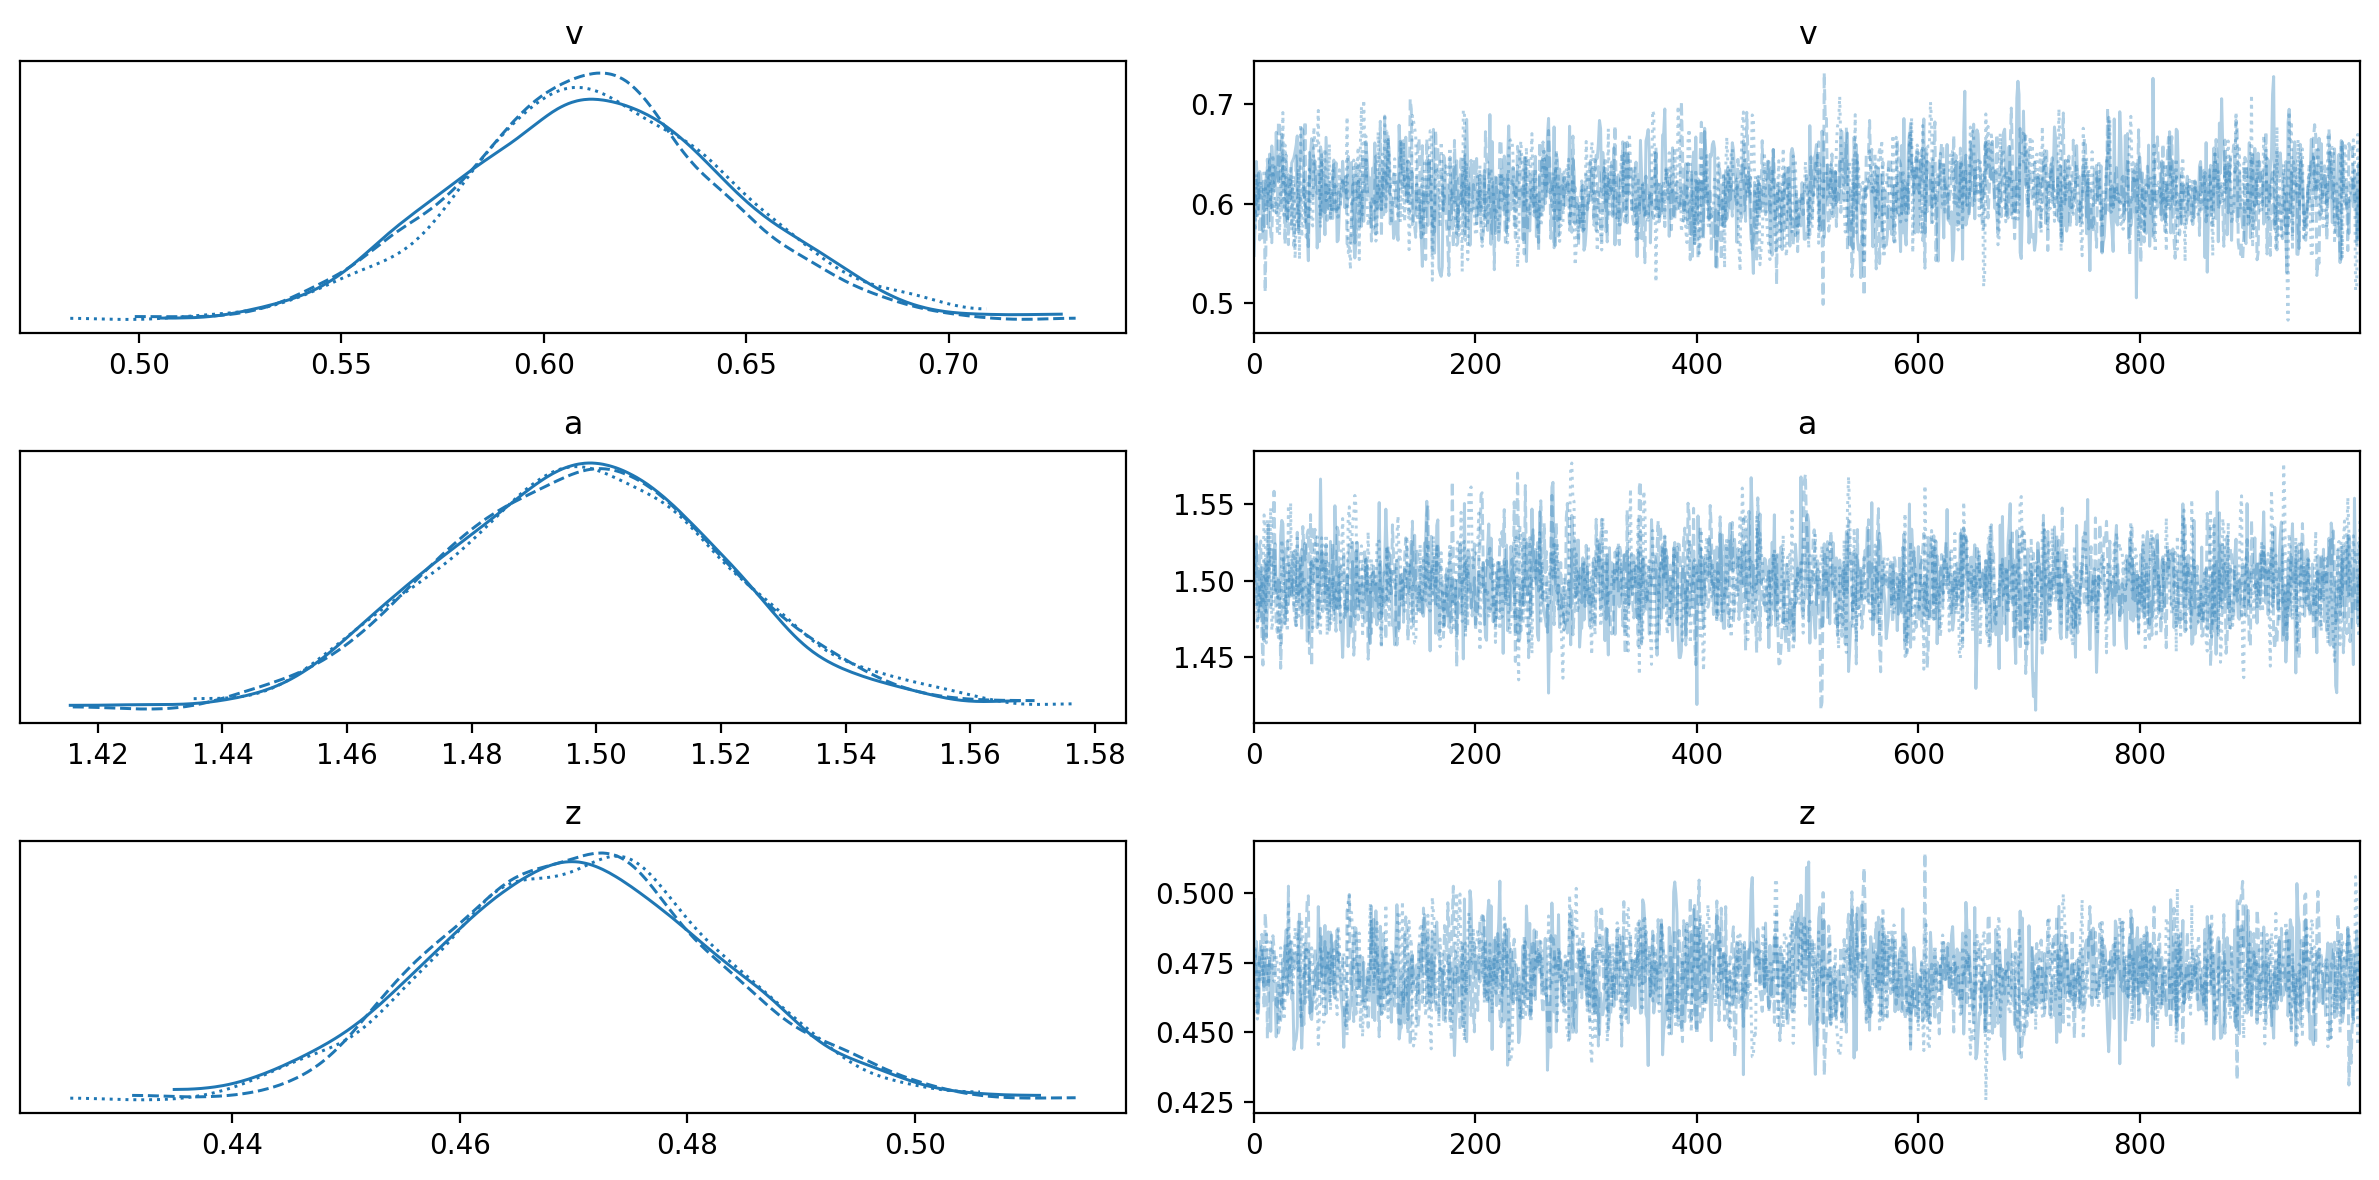

In [21]:
#### Step 4.2 trace plots
simple_ddm_model_ex2.plot_trace()

### Step 5: Posterior predictive checks

More on this is coming soon. 
For now, use my PPC script on github: https://github.com/gingjehli/HDDM---Detailed-PPC
        

### Step 6: Model inference

We see that the parameters used to simulate the data are actually recovered pretty well.
v_true, a_true, z_true, t_true = [0.5, 1.5, 0.5, 0.5]

Quiz:
why does t_true not show up in the posterior statistics?
yes exactly - because we fixed it to a specific value! :) 


In [ ]:
## A selection of useful functions:
az.plot_forest(simple_ddm_model_ex2.traces) #often the plot you want to use to look for sign diffs

In [ ]:
az.plot_posterior(simple_ddm_model_ex2.traces) # visualize the marginal posteriors that is provided by the plot_posterior() function. 

In [ ]:
az.plot_pair(simple_ddm_model_ex2.traces, kind="kde") # useful to check for simple parameter tradeoffs thst may emerge.

# Tutorial 2: Beyond DDMs (Example with Angle model)

In this tutorial, we will delve into the application of an angle model, a variant of the Sequential Sampling Model (SSM) that incorporates an additional parameter (theta) dictating the angle of a linearly collapsing boundary. This approach has been empirically applied and documented in the study by Ging-Jehli, Kuhn, et al. (2024) featured in Biological Psychiatry CNN. To simplify our analysis, we will initially focus on examining the data of a single participant, thereby sidestepping considerations of hierarchical structures. Notably, in contrast to previous tutorials, we will now set the parameter 'loglik_kind="approx_differentiable"' in step 2 of our modeling process.

### Step 1: data simulation

In [19]:
# define model parameters for data simulation:
v_true, a_true, z_true, t_true, theta_true = [0.5, 1.5, 0.5, 0.5, 0.2]

# simulate data:
obs_angle = simulator.simulator(
    [v_true, a_true, z_true, t_true, theta_true], 
    model="angle", 
    n_samples=1000
)

# make a nice dataframe out of it:
dataset_angle = pd.DataFrame(
    np.column_stack([obs_angle["rts"][:, 0], obs_angle["choices"][:, 0]]),
    columns=["rt", "response"],
)
dataset_angle

rt  response
0    0.893553       1.0
1    2.840811       1.0
2    2.430637       1.0
3    1.330636      -1.0
4    1.033631       1.0
..        ...       ...
995  2.127906       1.0
996  3.246929      -1.0
997  2.062554       1.0
998  2.588017       1.0
999  2.609413      -1.0

[1000 rows x 2 columns]

### Step 2: Define your model and priors

In [30]:
## check the default priors:

simple_angle_model_ex1 = hssm.HSSM(
    data=dataset_angle,
    model="angle",
    prior_settings="safe", # prior_settings=None,
    loglik_kind="approx_differentiable",
)
simple_angle_model_ex1


Hierarchical Sequential Sampling Model
Model: angle

Response variable: rt,response
Likelihood: approx_differentiable
Observations: 1000

Parameters:

v:
    Prior: Uniform(lower: -3.0, upper: 3.0)
    Explicit bounds: (-3.0, 3.0)
a:
    Prior: Uniform(lower: 0.30000001192092896, upper: 3.0)
    Explicit bounds: (0.3, 3.0)
z:
    Prior: Uniform(lower: 0.10000000149011612, upper: 0.8999999761581421)
    Explicit bounds: (0.1, 0.9)
t:
    Prior: Uniform(lower: 0.0010000000474974513, upper: 2.0)
    Explicit bounds: (0.001, 2.0)
theta:
    Prior: Uniform(lower: -0.10000000149011612, upper: 1.2999999523162842)
    Explicit bounds: (-0.1, 1.3)

Lapse probability: 0.05
Lapse distribution: Uniform(lower: 0.0, upper: 10.0)

In [36]:
## check what likelihood were are using:
simple_angle_model_ex1.loglik_kind

'approx_differentiable'

### Step 3: Sampling from the Posterior Distribution (Model fitting)

In [37]:
samples_angle_ex1  = simple_angle_model_ex1.sample(
    sampler="nuts_numpyro",
    chains=2,
    cores=1,
    draws=2000,
    tune=1000,
    idata_kwargs=dict(log_likelihood=False),  # no need to return likelihoods here
)

Compiling...
Compilation time = 0:00:01.440211
Sampling...
/users/ngingje1/.conda/envs/pyHSSM/lib/python3.11/site-packages/jax/_src/numpy/array_methods.py:728: UserWarning: Explicitly requested dtype float64 requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return getattr(self.aval, name).fun(self, *args, **kwargs)
Running chain 1: 100%|██████████| 3000/3000 [02:13<00:00, 22.51it/s]
Sampling time = 0:02:13.723743
Transforming variables...
Transformation time = 0:00:00.272642


### Step 4: Model validation

See Tutorial 1, step 3 for suggestions how to troubleshoot if model does not converge.

In [38]:
#### quick posterior statistics 
simple_angle_model_ex1.summary()

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
t      0.515  0.032   0.456    0.572      0.001    0.001    1694.0    2147.0   
theta  0.259  0.033   0.195    0.318      0.001    0.001    1621.0    1878.0   
a      1.567  0.070   1.437    1.693      0.002    0.001    1584.0    1622.0   
z      0.506  0.014   0.479    0.531      0.000    0.000    1710.0    2024.0   
v      0.525  0.042   0.446    0.605      0.001    0.001    1857.0    1865.0   

       r_hat  
t        1.0  
theta    1.0  
a        1.0  
z        1.0  
v        1.0

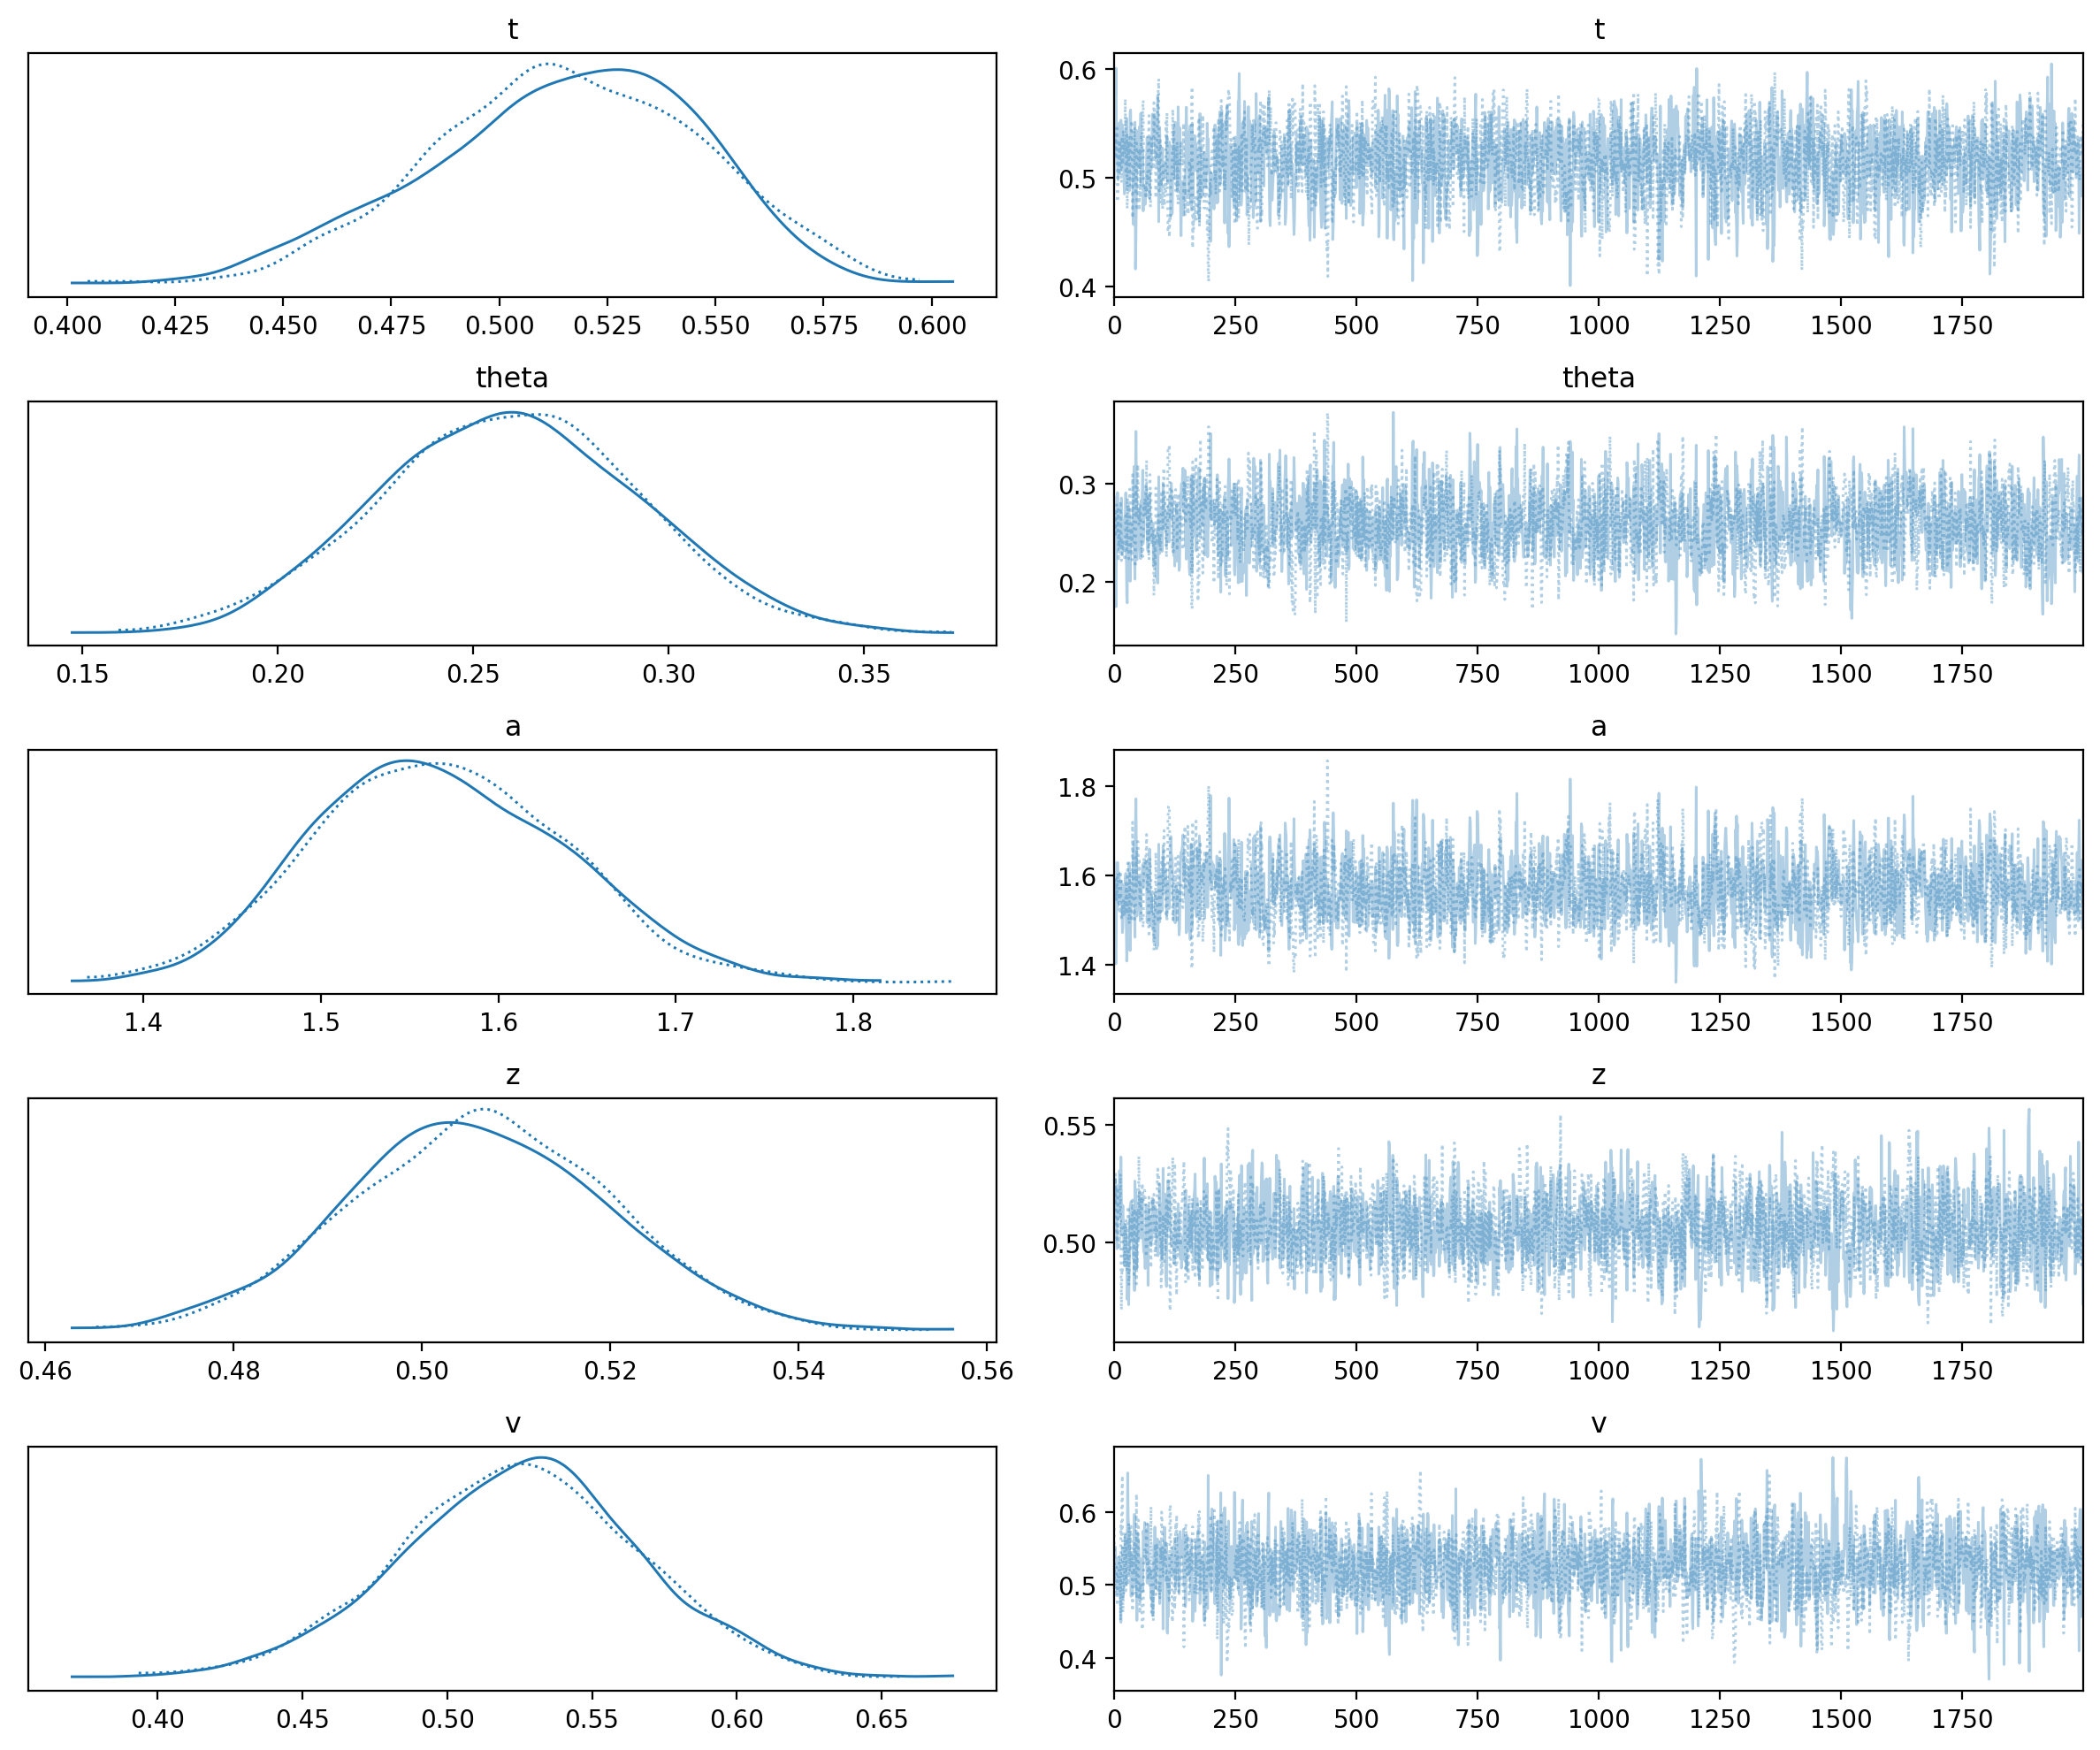

In [39]:
#### trace plots
simple_angle_model_ex1.plot_trace(); 

### Step 5: Posterior predictive checks

More on this is coming soon. 
For now, use my PPC script on github: https://github.com/gingjehli/HDDM---Detailed-PPC
        

### Step 6: Model inference

see tutorial 1.

# Tutorial 3: Regression-based DDM models (within-sbj design only)

In this tutorial, we delve into the capabilities of hierarchical modeling for variables that exhibit within-participant variability, also known as within-subject design variables. We simulate data where we assume the presence of electrophysiological recordings from the subthalamic nucleus (STN) and the globus pallidus external segment (GPe) on a trial-by-trial basis across subjects. In (neuro)cognitive experiments, participants typically undergo multiple trials, and it's common to assume that behavior across trials within a participant contains a subject-specific component. This component is consistent across all trials for a given participant but varies between participants. These individual differences can manifest as distinct patterns observable across all trials for each participant, while still differing between subjects. To address this, we introduce subject-specific effects as an additional hierarchical level in our model. This approach enables us to estimate the influence of individual differences on the observed data.

## Example 1: Regression-based simulation with 1 hierarchical level (trials)

In this example, we assume that drift rate varies across trials, influenced by a constant offset and neural activity in the subthalamic nucleus (STN) and globus pallidus external segment (GPe). To capture this relationship statistically, we employ a regression-based model expressed as: v = 1.5 + 0.8 * zSTN + 0.3 * zGPe. 
Using these predefined values for the intercept (1.5) and coefficients (0.8, 0.3), we simulate data and subsequently aim to recover these coefficients when estimating the model parameters using the generated data.

### Step 1: data simulation

In [10]:
## Let's assume we have two neural measures (STN, GPe) that are varying on a trial-by-trial basis
## so, let's first simulate some data for STN, GPe. 
## Let's assume they follow a normal distribution (bc they are z-scored) but each with a separate mean.

intercept = 1.5
zSTN = np.random.normal(loc=1, scale=2, size=1000) #np.random.uniform(-5.0, 5.0, size=1000)
zGPe = np.random.normal(loc=1, scale=2, size=1000) #np.random.uniform(-5.0, 5.0, size=1000)
v = intercept + 0.8 * zSTN + 0.3 * zGPe

true_values = np.column_stack([v, np.repeat([[1.5, 0.5, 0.5]], axis=0, repeats=1000)])
true_values.shape

dataset_ddm_reg_v = hssm.simulate_data(
    model="ddm",
    theta=true_values,
    size=1,  # Generate one data point for each of the 1000 set of true values
)

dataset_ddm_reg_v["zSTN"] = zSTN
dataset_ddm_reg_v["zGPe"] = zGPe
dataset_ddm_reg_v["participant_id"] = 1
dataset_ddm_reg_v

rt  response      zSTN      zGPe  participant_id
0    0.872061       1.0  1.069094 -1.604430               1
1    1.847278       1.0 -1.419617  1.577915               1
2    0.833145       1.0  1.016712  1.782328               1
3    0.747180       1.0  2.226748  2.173957               1
4    1.043985       1.0  0.775712  3.262797               1
..        ...       ...       ...       ...             ...
995  0.806792       1.0  2.546668  1.616490               1
996  1.315987       1.0  0.533014  4.116900               1
997  0.647170       1.0  3.507711  1.757374               1
998  1.019634       1.0  1.795382  0.515078               1
999  0.901872       1.0  3.029503  1.011051               1

[1000 rows x 5 columns]

### Step 2: Define your model and priors

   
#### Some general weakly-informative priors used by the STAN community:
- sigma, the error standard deviation, has a default prior that is exponential(1)
- Coefficients: By default the regression coefficients (in this case the coefficients on the wt and am variables) are treated as a priori independent with normal priors centered at 0 and with scale (standard deviation) 2.5.
- Intercept: For the intercept, the default prior is normal with mean 0 and standard deviation 2.5

##### from Stan:
the prior applies to the intercept after all predictors have been centered (a similar note can be found in the documentation of the prior_intercept argument). In many cases the value of y when x=0 is not meaningful and it is easier to think about the value when x=x. Therefore placing a prior on the intercept after centering the predictors typically makes it easier to specify a reasonable prior for the intercept. (Note: the user does not need to manually center the predictors.)

#### some useful links to decide on priors:
https://mc-stan.org/rstanarm/articles/priors.html#:~:text=For%20specifying%20priors%2C%20the%20stan_glm%20function%20accepts%20the,%2B%20am%2C%20data%20%3D%20mtcars%2C%20chains%20%3D%201%29

https://mc-stan.org/rstanarm/reference/priors.html

In [41]:
model_reg_v_ex1 = hssm.HSSM(
    data=dataset_ddm_reg_v,
    include=[
        {
            "name": "v",
            "formula": "v ~ 1 + zSTN + zGPe",
            "prior": {
                # All ways to specify priors in the non-regression case work the same way here.
                "Intercept": {"name": "Normal", "mu": 0, "sigma": 2.5},
                "zSTN": {"name": "Normal", "mu": 0, "sigma": 2.5},
                "zGPe": {"name": "Normal", "mu": 0, "sigma": 2.5},
            },
            "link": "identity",
            # "bounds": (-10.0, 10.0)
        }
    ],
)
model_reg_v_ex1

Hierarchical Sequential Sampling Model
Model: ddm

Response variable: rt,response
Likelihood: analytical
Observations: 1000

Parameters:

v:
    Formula: v ~ 1 + zSTN + zGPe
    Priors:
        v_Intercept ~ Normal(mu: 0.0, sigma: 2.5)
        v_zSTN ~ Normal(mu: 0.0, sigma: 2.5)
        v_zGPe ~ Normal(mu: 0.0, sigma: 2.5)
    Link: identity
    Explicit bounds: (-inf, inf)
a:
    Prior: HalfNormal(sigma: 2.0)
    Explicit bounds: (0.0, inf)
z:
    Prior: Uniform(lower: 0.0, upper: 1.0)
    Explicit bounds: (0.0, 1.0)
t:
    Prior: HalfNormal(sigma: 2.0, initval: 0.10000000149011612)
    Explicit bounds: (0.0, inf)

Lapse probability: 0.05
Lapse distribution: Uniform(lower: 0.0, upper: 10.0)

### Step 3: Sampling from the Posterior Distribution (Model fitting)

In [43]:
samples_model_reg_v_ex1 = model_reg_v_ex1.sample(
    sampler="nuts_numpyro",  # type of sampler to choose, 'nuts_numpyro', 'nuts_blackjax' of default pymc nuts sampler
    cores=1,  # how many cores to use
    chains=3,  # how many chains to run
    draws=1000,  # number of draws from the markov chain
    tune=500,  # number of burn-in samples
    idata_kwargs=dict(log_likelihood=True),  # return log likelihood
    
)  # mp_ctx="forkserver")


Compiling...
Compilation time = 0:00:08.604994
Sampling...
/users/ngingje1/.conda/envs/pyHSSM/lib/python3.11/site-packages/jax/_src/numpy/array_methods.py:728: UserWarning: Explicitly requested dtype float64 requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return getattr(self.aval, name).fun(self, *args, **kwargs)
Compiling.. :   0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

Running chain 1:   0%|          | 0/1500 [00:05<?, ?it/s]

Running chain 2:   0%|          | 0/1500 [00:05<?, ?it/s]

Running chain 1:   5%|▌         | 75/1500 [00:09<01:04, 22.16it/s]

Running chain 0:  10%|█         | 150/1500 [00:13<01:12, 18.66it/s]

Running chain 1:  15%|█▌        | 225/1500 [00:16<01:01, 20.77it/s]

Running chain 1:  20%|██        | 300/1500 [00:19<00:5

### Step 4: Model validation

In [44]:
#### quick posterior statistics 
model_reg_v_ex1.summary()

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
v_Intercept  1.517  0.059   1.409    1.624      0.001    0.001    1774.0   
v_zSTN       0.820  0.039   0.747    0.892      0.001    0.001    2607.0   
v_zGPe       0.292  0.033   0.231    0.357      0.001    0.000    2895.0   
a            1.470  0.043   1.391    1.550      0.001    0.001    1823.0   
z            0.504  0.018   0.470    0.539      0.000    0.000    1762.0   
t            0.514  0.016   0.485    0.545      0.000    0.000    1546.0   

             ess_tail  r_hat  
v_Intercept    2158.0    1.0  
v_zSTN         1815.0    1.0  
v_zGPe         1739.0    1.0  
a              1511.0    1.0  
z              1790.0    1.0  
t              1553.0    1.0

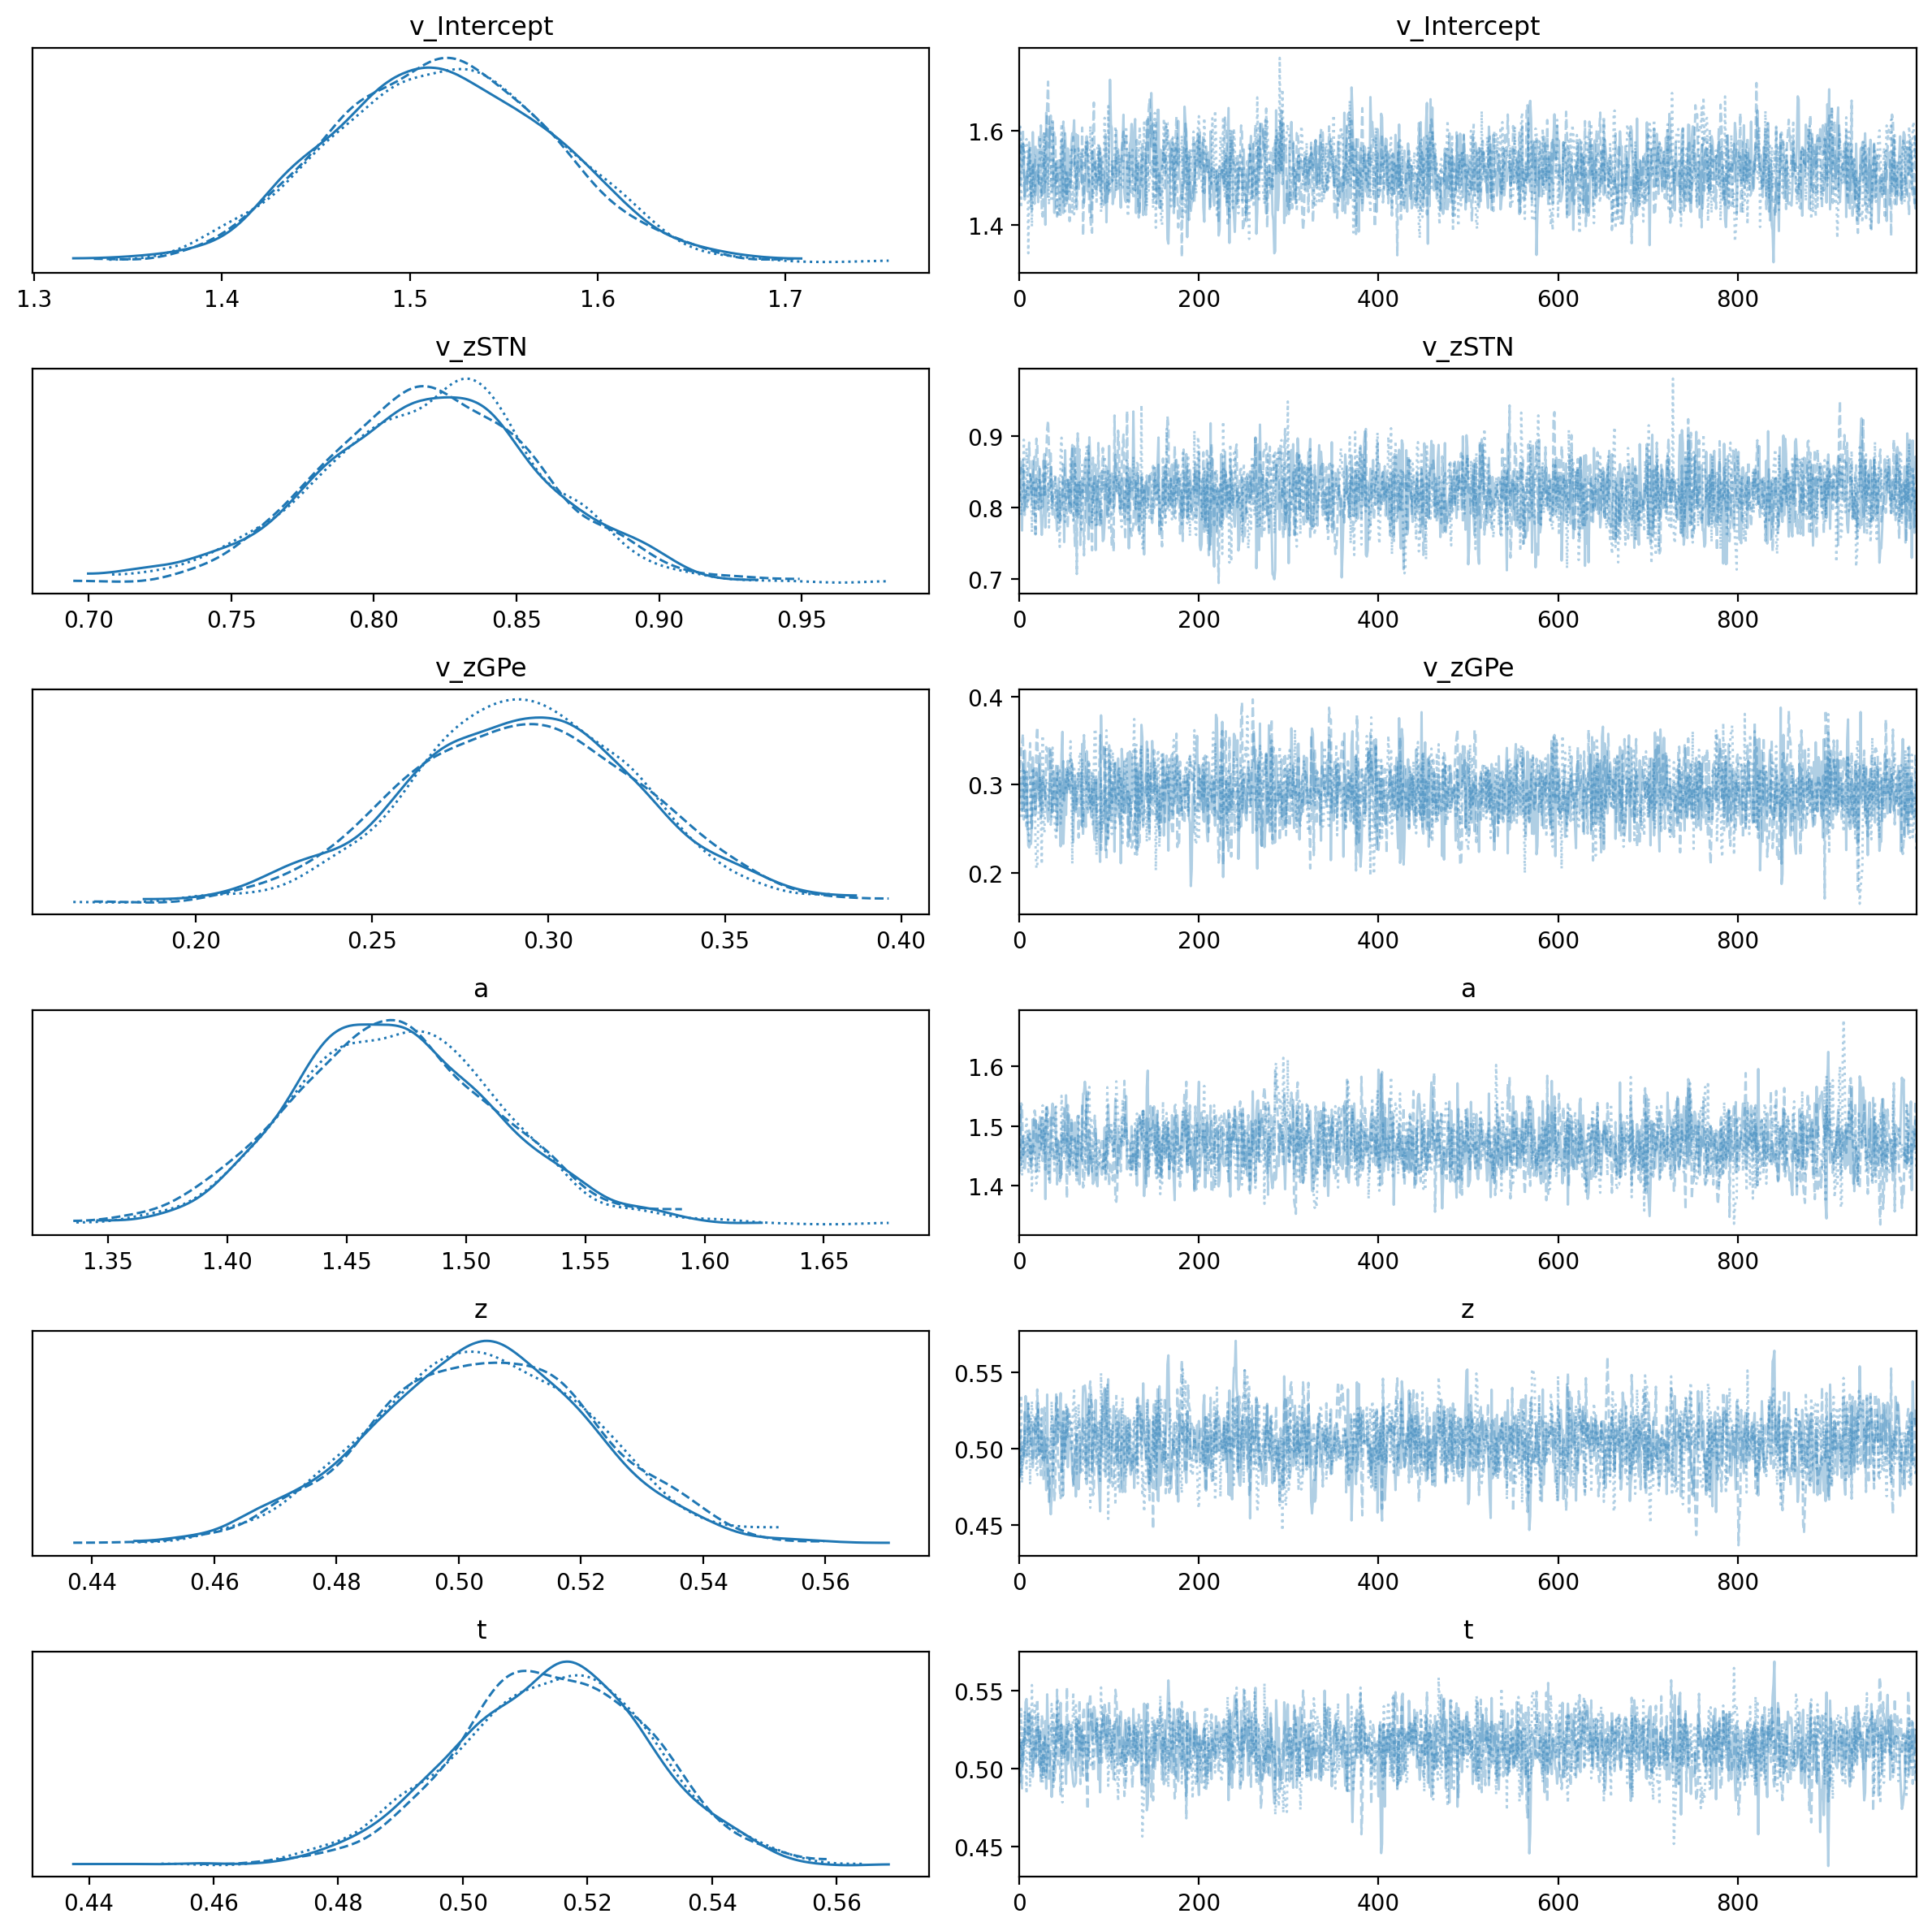

In [45]:
#### trace plots
model_reg_v_ex1.plot_trace(); 

### Step 5: Model inference

## Example 2: Regression-based simulation with 2 hierarchical levels (trials, participants)

This extends example 1 by simulating data from multiple subjects and then nest the trials within participants.

### Step 1: Regression-based data simulation of multiple participants

In [4]:
# Function to simulate data for one participant
def simulate_participant(participant_id):
    intercept = 1.5
    zSTN = np.random.normal(loc=1, scale=2, size=1000)
    zGPe = np.random.normal(loc=1, scale=2, size=1000)
    v = intercept + 0.8 * zSTN + 0.3 * zGPe
    
    # Assume `hssm.simulate_data` returns a DataFrame
    true_values = np.column_stack([v, np.repeat([[1.5, 0.5, 0.5]], axis=0, repeats=1000)])
    dataset_reg_v = hssm.simulate_data(
        model="ddm",
        theta=true_values,
        size=1,  # Generate one data point for each of the 1000 set of true values
    )
    
    # Adding additional variables to the dataset
    dataset_reg_v["zSTN"] = zSTN
    dataset_reg_v["zGPe"] = zGPe
    dataset_reg_v["participant_id"] = participant_id
    
    return dataset_reg_v

# Simulate data for two participants
dataset_participant1 = simulate_participant(1)
dataset_participant2 = simulate_participant(2)
dataset_participant3 = simulate_participant(3)
dataset_participant4 = simulate_participant(4)

# Combine datasets into one DataFrame
combined_dataset = pd.concat([dataset_participant1, 
                              dataset_participant2,
                              dataset_participant3,
                              dataset_participant4
                             ], 
                             ignore_index=True)
combined_dataset

rt  response      zSTN      zGPe  participant_id
0     0.966581       1.0  0.675687 -0.306395               1
1     3.785158       1.0 -1.120297 -1.183014               1
2     0.967596       1.0  2.691423 -1.475410               1
3     0.978076       1.0  4.012903  3.071835               1
4     1.196441       1.0  0.621377  1.610247               1
...        ...       ...       ...       ...             ...
3995  1.367157       1.0  0.606655  1.936071               4
3996  1.775138       1.0 -0.634357  3.230316               4
3997  0.907728       1.0  1.013415  1.723017               4
3998  2.733103       1.0 -2.413300  3.507771               4
3999  0.701568       1.0  2.682635  3.019167               4

[4000 rows x 5 columns]

### Step 2: Define your model and priors

In [6]:
model_reg_v_ex2_A2 = hssm.HSSM(
    data=combined_dataset,
    include=[
        {
            "name": "v",
            "formula": "v ~ 1 + zSTN + zGPe + (1 + zSTN + zGPe | participant_id)",
            "prior": {
                # All ways to specify priors in the non-regression case work the same way here.
                "Intercept": {"name": "Normal", "mu": 0, "sigma": 2.5},
                "zSTN": {"name": "Normal", "mu": 0, "sigma": 2.5},
                "zGPe": {"name": "Normal", "mu": 0, "sigma": 2.5},
            },
            "link": "identity",
            # "bounds": (-10.0, 10.0)
        }
    ],
)
model_reg_v_ex2_A2

Hierarchical Sequential Sampling Model
Model: ddm

Response variable: rt,response
Likelihood: analytical
Observations: 4000

Parameters:

v:
    Formula: v ~ 1 + zSTN + zGPe + (1 + zSTN + zGPe | participant_id)
    Priors:
        v_Intercept ~ Normal(mu: 0.0, sigma: 2.5)
        v_zSTN ~ Normal(mu: 0.0, sigma: 2.5)
        v_zGPe ~ Normal(mu: 0.0, sigma: 2.5)
        v_1|participant_id ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 2.5))
        v_zSTN|participant_id ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.2416000366210938))
        v_zGPe|participant_id ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.2581000328063965))
    Link: identity
    Explicit bounds: (-inf, inf)
a:
    Prior: HalfNormal(sigma: 2.0)
    Explicit bounds: (0.0, inf)
z:
    Prior: Uniform(lower: 0.0, upper: 1.0)
    Explicit bounds: (0.0, 1.0)
t:
    Prior: HalfNormal(sigma: 2.0, initval: 0.10000000149011612)
    Explicit bounds: (0.0, inf)

Lapse probability: 0.05
Lapse distribution: Uniform(lower: 0.0, upper: 10.

###### Alternatively:
note that we could have changed the priors for the other parameters explicitly as follows:

In [ ]:
model_reg_v_ex2_A1 = hssm.HSSM(
    data=combined_dataset,
    include=[
    {
            "name": "t",
            "prior": {"name": "HalfNormal", "mu": .4, "sigma": 1}, #this is something you can really see from your QP-plot
            "formula": "t ~ 1 + (1 | participant_id)", 
            "link": "identity",
        },
        {
            "name": "z",
            "prior": {"name": "Uniform", "lower": 0.0, "upper": 1.0},
            "formula": "z ~ 1 + (1 | participant_id)",
            "link": "identity",
        },
        {
            "name": "a",
            "prior": {"name": "HalfNormal", "mu": 0, "sigma": 2.5},
            "formula": "a ~ 1 + (1 | participant_id)",
            "link": "identity",
        },
        
    ],
)
model_reg_v_ex2_A1

###### Alternatively:
we could have used: `hierarchical` to True

In [ ]:
model_reg_v_ex2_A3 = hssm.HSSM(data=combined_dataset, 
                               hierarchical=True, 
                               prior_settings="safe", # prior_settings=None,
                               loglik_kind="approx_differentiable",
                              )
model_reg_v_ex2_A3 

### Step 3: Sampling from the Posterior Distribution (Model fitting)

In [7]:
## Sampling for alternative 2
#### this did work
samples_model_reg_v_ex2_2 = model_reg_v_ex2_A2.sample(
    sampler="nuts_numpyro",  # type of sampler to choose, 'nuts_numpyro', 'nuts_blackjax' of default pymc nuts sampler
    cores=1,  # how many cores to use
    chains=3,  # how many chains to run
    draws=6000,  # number of draws from the markov chain
    tune=1000,  # number of burn-in samples
    idata_kwargs=dict(log_likelihood=True),  # return log likelihood
    
)  # mp_ctx="forkserver")


Compiling...
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
Compilation time = 0:00:04.812179
Sampling...
/users/ngingje1/.conda/envs/pyHSSM/lib/python3.11/site-packages/jax/_src/numpy/array_methods.py:728: UserWarning: Explicitly requested dtype float64 requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return getattr(self.aval, name).fun(self, *args, **kwargs)
Compiling.. :   0%|          | 0/7000 [00:00<?, ?it/s]

  0%|          | 0/7000 [00:00<?, ?it/s]

Running chain 0:   0%|          | 0/7000 [00:07<?, ?it/s]

Running chain 0:  10%|█         | 700/7000 [06:30<50:00,  2.10it/s]  

Running chain 1:  15%|█▌        | 1050/7000 [06:51<29:41,  3.34it/s]

Running chain 1:  20%|██        | 1400/7000 [07:39<22:00,  4.24it/s]

Running chain 1

### Step 4: Model validation

In [8]:
#### quick posterior statistics 
model_reg_v_ex2_A2.summary()

mean     sd  hdi_3%  hdi_97%  mcse_mean  \
v_Intercept                  1.545  0.043   1.465    1.625      0.001   
v_zSTN                       0.812  0.022   0.773    0.852      0.001   
v_zGPe                       0.293  0.018   0.264    0.326      0.000   
a                            1.531  0.024   1.485    1.575      0.000   
z                            0.489  0.010   0.470    0.507      0.000   
t                            0.492  0.005   0.482    0.503      0.000   
v_1|participant_id_sigma     0.036  0.045   0.000    0.105      0.001   
v_zSTN|participant_id_sigma  0.024  0.029   0.000    0.070      0.001   
v_zGPe|participant_id_sigma  0.020  0.026   0.000    0.057      0.001   
v_1|participant_id[1]        0.004  0.033  -0.056    0.071      0.000   
v_1|participant_id[2]       -0.003  0.034  -0.071    0.059      0.000   
v_1|participant_id[3]        0.002  0.034  -0.064    0.066      0.000   
v_1|participant_id[4]       -0.003  0.034  -0.072    0.057      0.000   
v_zSTN|participant_id[1]    -0.001  0.021  -0.041    0.039      0.001   
v_zSTN|participant_id[2]    -0.005  0.021  -0.049    0.032      0.001   
v_zSTN|participant_id[3]    -0.005  0.022  -0.045    0.035      0.001   
v_zSTN|participant_id[4]     0.007  0.021  -0.027    0.052      0.000   
v_zGPe|participant_id[1]     0.002  0.018  -0.031    0.036      0.000   
v_zGPe|participant_id[2]    -0.003  0.018  -0.038    0.028      0.000   
v_zGPe|participant_id[3]     0.005  0.018  -0.025    0.041      0.001   
v_zGPe|participant_id[4]    -0.002  0.018  -0.037    0.029      0.000   

                             mcse_sd  ess_bulk  ess_tail  r_hat  
v_Intercept                    0.000    7756.0    6069.0    1.0  
v_zSTN                         0.000    3682.0    1780.0    1.0  
v_zGPe                         0.000    4576.0    2075.0    1.0  
a                              0.000   14290.0   11609.0    1.0  
z                              0.000    9899.0    8551.0    1.0  
t                              0.000    9951.0   11532.0    1.0  
v_1|participant_id_sigma       0.001    3593.0    2917.0    1.0  
v_zSTN|participant_id_sigma    0.000    3802.0    2534.0    1.0  
v_zGPe|participant_id_sigma    0.001    3779.0    1794.0    1.0  
v_1|participant_id[1]          0.000    9082.0    6453.0    1.0  
v_1|participant_id[2]          0.001    9489.0    6722.0    1.0  
v_1|participant_id[3]          0.001    7962.0    6363.0    1.0  
v_1|participant_id[4]          0.001    9671.0    6308.0    1.0  
v_zSTN|participant_id[1]       0.001    3921.0    1993.0    1.0  
v_zSTN|participant_id[2]       0.001    4091.0    1917.0    1.0  
v_zSTN|participant_id[3]       0.001    3884.0    1980.0    1.0  
v_zSTN|participant_id[4]       0.000    3835.0    2087.0    1.0  
v_zGPe|participant_id[1]       0.001    4513.0    2357.0    1.0  
v_zGPe|participant_id[2]       0.001    3943.0    2187.0    1.0  
v_zGPe|participant_id[3]       0.001    4107.0    2333.0    1.0  
v_zGPe|participant_id[4]       0.001    3795.0    2294.0    1.0

#### Let's look at a bad example
Below is an example of how it should not look like :)

In [52]:
model_reg_v_ex2.summary()

mean     sd  hdi_3%  hdi_97%  mcse_mean  \
v_Intercept                 -0.128  0.474  -0.745    0.408      0.273   
v_zSTN                      -0.339  0.483  -0.749    0.340      0.279   
v_zGPe                      -0.116  0.294  -0.481    0.239      0.170   
a_Intercept                  0.188  0.547  -0.264    0.958      0.316   
z_Intercept                 -0.055  0.173  -0.208    0.186      0.100   
t_Intercept                 -0.309  0.153  -0.439   -0.095      0.088   
v_1|participant_id_sigma     2.787  1.152   1.424    4.240      0.664   
v_zSTN|participant_id_sigma  3.091  1.374   2.010    5.030      0.793   
v_zGPe|participant_id_sigma  3.102  0.797   2.084    4.029      0.460   
a_1|participant_id_sigma     1.608  0.630   0.929    2.447      0.364   
z_1|participant_id_sigma     1.135  0.274   0.748    1.339      0.158   
t_1|participant_id_sigma     1.447  0.939   0.452    2.706      0.542   
v_1|participant_id[1]       -0.810  1.536  -2.837    0.882      0.886   
v_1|participant_id[2]       -0.540  0.304  -0.944   -0.211      0.175   
v_1|participant_id[3]       -1.965  0.919  -2.821   -0.691      0.530   
v_1|participant_id[4]       -1.069  2.113  -3.832    1.300      1.219   
v_zSTN|participant_id[1]    -1.050  0.108  -1.200   -0.949      0.062   
v_zSTN|participant_id[2]    -0.859  1.060  -2.357   -0.097      0.611   
v_zSTN|participant_id[3]     0.996  2.096  -1.812    3.224      1.209   
v_zSTN|participant_id[4]     0.604  3.057  -1.792    4.918      1.764   
v_zGPe|participant_id[1]    -0.152  1.011  -1.383    1.092      0.583   
v_zGPe|participant_id[2]    -0.573  1.438  -2.348    1.173      0.830   
v_zGPe|participant_id[3]     0.200  0.559  -0.587    0.644      0.322   
v_zGPe|participant_id[4]     0.607  2.827  -2.919    4.002      1.631   
a_1|participant_id[1]        0.623  0.615  -0.219    1.232      0.355   
a_1|participant_id[2]       -0.516  1.365  -2.369    0.879      0.788   
a_1|participant_id[3]        0.330  0.905  -0.763    1.454      0.522   
a_1|participant_id[4]       -0.223  0.382  -0.546    0.314      0.221   
z_1|participant_id[1]       -0.254  0.407  -0.629    0.311      0.235   
z_1|participant_id[2]        0.556  0.218   0.264    0.786      0.126   
z_1|participant_id[3]       -0.477  0.599  -0.925    0.369      0.346   
z_1|participant_id[4]       -0.130  0.408  -0.639    0.361      0.236   
t_1|participant_id[1]       -0.198  0.254  -0.428    0.155      0.146   
t_1|participant_id[2]        0.437  1.336  -1.084    2.169      0.771   
t_1|participant_id[3]       -0.063  0.523  -0.786    0.431      0.302   
t_1|participant_id[4]        0.506  0.197   0.347    0.784      0.114   

                             mcse_sd  ess_bulk  ess_tail         r_hat  
v_Intercept                    0.216       3.0       3.0  4.771835e+15  
v_zSTN                         0.220       3.0       3.0  4.771835e+15  
v_zGPe                         0.134       3.0       3.0  4.771835e+15  
a_Intercept                    0.249       3.0       3.0  4.771835e+15  
z_Intercept                    0.079       3.0       3.0  4.771835e+15  
t_Intercept                    0.070       3.0       3.0  4.771835e+15  
v_1|participant_id_sigma       0.525       3.0       3.0  4.771835e+15  
v_zSTN|participant_id_sigma    0.626       3.0       3.0  4.771835e+15  
v_zGPe|participant_id_sigma    0.363       3.0       3.0  4.771835e+15  
a_1|participant_id_sigma       0.287       3.0       3.0  4.771835e+15  
z_1|participant_id_sigma       0.125       3.0       3.0  4.771835e+15  
t_1|participant_id_sigma       0.428       3.0       3.0  4.771835e+15  
v_1|participant_id[1]          0.700       3.0       3.0  4.771835e+15  
v_1|participant_id[2]          0.139       3.0       3.0  4.771835e+15  
v_1|participant_id[3]          0.419       3.0       3.0  4.771835e+15  
v_1|participant_id[4]          0.963       3.0       3.0  4.771835e+15  
v_zSTN|participant_id[1]       0.049       3.0       3.0  4.771835e+15  
v_zSTN|partici

In [ ]:
### Step 5: Model inference

our original parameters:
intercept = 1.5
zSTN = np.random.normal(loc=1, scale=2, size=1000)
zGPe = np.random.normal(loc=1, scale=2, size=1000)
v = intercept + 0.8 * zSTN + 0.3 * zGPe

true_values = np.column_stack([v, np.repeat([[1.5, 0.5, 0.5]], axis=0, repeats=1000)])

## Example 3: Regression-based simulation with 3 hierarchical levels (trials, participants, groups)

In this example, we extend our previous case further to assume that participants are now part of one of two groups. 

### note on support of uncorrelated random effects

Let's assume we want to fit a hierarchical model with three layers (trials that are nested in participants which are nested in groups). Let's further assume that the random effects (intercepts and coefficients) are:
- correlated within participants
- correlated among participants of the same group
- uncorrelated between groups

Following STAN/lme4 notation, I would define the model as follows:

- v ~ 1 + group + (zSTN + zGPe)*group + (1 + zSTN + zGPe | participant_id) + (1 + zSTN + zGPe | group/participant_id) + (1 + zSTN + zGPe || group)

Though, note that the standard notation of double bars "||" is not recognized in HSSM.
Double bars typically indicate that we don't want to estimate correlations between intercepts and slopes.
The above model would be a simplification of a full hierarchical model specified as follows (for which I would need to estimate the full correlation matrix):

- v ~ 1 + group + (zSTN + zGPe)*group + (1 + zSTN + zGPe | group/participant_id)


### Step 1: Regression-based data simulation

We adjust our simulation routine above to accommodate two different groups of participants, with each group having different values for the parameters that are multiplied by zSTN and zGPe, we can introduce a group parameter to your function. 
Each group will then have its own specific coefficients for these variables. 

**Quiz:** <br>
Why do we not add the "group" variable as an additional hierarchical (nested) layer? <br>
Specifically, why do we use this specification: <br>
    v ~ 1 + group + (zSTN + zGPe)*group + (1 + zSTN + zGPe | participant_id) <br>
instead of this specification: <br>
    v ~ 1 + group + (zSTN + zGPe)*group + (1 + zSTN + zGPe | group/participant_id)
    
Explanations:
If we wanted to estimate the groups themselves as coming from a larger distribution, then with few groups wouldn't have enough data to estimate the variance of that higher level distribution (e.g based on Gelman's work and his larger discussions on choices of the hyperpriors for the variance params). So, if you run a hierarchical model with a grouping variable as a btw-sbj effect, make sure that you have at least 5 groups. That's the minimal nr that Gelman and Hill suggest to add "group" as a separate hierarchical level to your model. If you have only two values for group (e.g., adhd, ctrl), you will either want to estimate separate models (if you assume that they don't share common standard deviations) or you will need to use the groups' empirical means as priors (and then you could add an additional variable to account and explicitly model measurement errors). If you have only two groups and you use weakly informed (or even worse: uninformed) priors, the posteriors for those group estimates will have a high SD. This makes sense because it's analogous to fitting an OLS regression line through only two datapoints - the CIs need to be large in this case. Alternatively, don't specify the full random effect matrix (which means you don't treat the group variable as an entirely separate hierarchical level). 

If we say that a Bayesian adds an additional hierarchical level for “group” (ie explicitly modeling btw and within group variability) then in frequentist notation this means I specify the model like this: v ~ 1 + x*group + (1 + x | group/sbj). But this model 1 is problematic if you have only two groups bc it tries to explicitly model the btw-group variability and it has only two datapoints for doing that. So, it will produce very wide posteriors and most likely Rhat suggests unreliable estimates. So what frequentists typically do if models fail like that: they simplify the random structure by redefining it like this: v ~ 1 + x*group + (1 + x | sbj). This model is also fine but it’s not explicitly modeling the variability btw groups but instead assumes a fixed effect for each group. It therefore does not account for the full hierarchical (sbj nested in groups) structure of the data. It’s not adding a separate hierarchical level. These are subtle but important diffs bc these models don’t have the same complexity and degrees of freedom. That’s why frequentist statistician often push people to specify the full random structure that people use in LMMs.

If we model only that one param with group as a fixed effect (i.e., without explicitly modeling the between-group variability by not adding group as a random effect snd therefore hierarchical level), we don’t directly borrow statistical strength for modeling that group effect in the same way as when you explicitly include group as a random effect (and therefore additional hierarchical level).Estimating fixed effects means each group level is associated with a unique effect representing the avg change for that group (without estimating the var btw groups from which the statistical shrinkage strength is typically coming from). Though, we can still borrow statistical strength if we model the subgroups jointly because in this case, the overarching group is larger when both subgroups are modeled jointly as one, and then each individual can be more informed by all the subjects, while still allowing the mean of one (or more) of the group distributions to be shifted by a parameter that we estimate. Of course this doesn't hold if the params from one subgroup are not informative about those in the other.


In [3]:
# Function to simulate data for one participant, including group assignment
def simulate_participant(participant_id, group):
    intercept = 1.5
    
    # Different values for coefficients based on group
    if group == 'Ctrl':
        coeff_zSTN = 0.8
        coeff_zGPe = 0.3
    elif group == 'ADHD':
        coeff_zSTN = 0.5  # Example different coefficient for group B
        coeff_zGPe = 0.4  # Example different coefficient for group B
    
    zSTN = np.random.normal(loc=1, scale=2, size=1000)
    zGPe = np.random.normal(loc=1, scale=2, size=1000)
    v = intercept + coeff_zSTN * zSTN + coeff_zGPe * zGPe
    
    # Assuming `hssm.simulate_data` returns a DataFrame
    true_values = np.column_stack([v, np.repeat([[1.5, 0.5, 0.5]], axis=0, repeats=1000)])
    dataset_reg_v_hl = hssm.simulate_data(
        model="ddm",
        theta=true_values,
        size=1  # Generate one data point for each of the 1000 set of true values
    )
    
    # Adding additional variables to the dataset
    dataset_reg_v_hl["zSTN"] = zSTN
    dataset_reg_v_hl["zGPe"] = zGPe
    dataset_reg_v_hl["participant_id"] = participant_id
    dataset_reg_v_hl["group"] = group
    
    return dataset_reg_v_hl

# Simulate data for participants in two groups
dataset_participant1 = simulate_participant(1, 'Ctrl')
dataset_participant2 = simulate_participant(2, 'Ctrl')
dataset_participant3 = simulate_participant(3, 'ADHD')
dataset_participant4 = simulate_participant(4, 'ADHD')

# Combine datasets into one DataFrame
combined_dataset_3HL = pd.concat([dataset_participant1, 
                              dataset_participant2,
                              dataset_participant3,
                              dataset_participant4
                             ], 
                             ignore_index=True)

print(combined_dataset_3HL)

            rt  response      zSTN      zGPe  participant_id group
0     1.488629       1.0  0.094341  1.229594               1  Ctrl
1     0.828781       1.0  5.263637 -3.305501               1  Ctrl
2     0.737921       1.0  3.179991  2.378701               1  Ctrl
3     0.844299       1.0  2.023220  2.187766               1  Ctrl
4     0.758828       1.0  3.486502  5.539294               1  Ctrl
...        ...       ...       ...       ...             ...   ...
3995  1.047852       1.0  3.052719  3.002658               4  ADHD
3996  0.894331       1.0  5.177839  1.050127               4  ADHD
3997  0.907744       1.0  1.873981  1.202229               4  ADHD
3998  5.730231       1.0 -1.521803 -0.251737               4  ADHD
3999  1.052274       1.0  1.852744  3.947552               4  ADHD

[4000 rows x 6 columns]


### Step 2: Define your model and priors

In [4]:
## prior definition: Alternative 2
model_reg_v_ex3 = hssm.HSSM(
    data=combined_dataset_3HL,
    include=[
        {
            "name": "v",
            "formula": "v ~ 1 + group + (zSTN + zGPe)*group + (1 + zSTN + zGPe | participant_id)", #(1 + zSTN + zGPe | group/participant_id)
            "prior": {
                # All ways to specify priors in the non-regression case work the same way here.
                "Intercept": {"name": "Normal", "mu": 0, "sigma": 2.5},
                "zSTN": {"name": "Normal", "mu": 0, "sigma": 2.5},
                "zGPe": {"name": "Normal", "mu": 0, "sigma": 2.5},
                "group": {"name": "Normal", "mu": 0, "sigma": 2.5},
                "zSTN:group": {"name": "Normal", "mu": 0, "sigma": 2.5},
                "zGPe:group": {"name": "Normal", "mu": 0, "sigma": 2.5},
            },
            "link": "identity",
            # "bounds": (-10.0, 10.0)
        }
    ],
)
model_reg_v_ex3

Hierarchical Sequential Sampling Model
Model: ddm

Response variable: rt,response
Likelihood: analytical
Observations: 4000

Parameters:

v:
    Formula: v ~ 1 + group + (zSTN + zGPe)*group + (1 + zSTN + zGPe | participant_id)
    Priors:
        v_Intercept ~ Normal(mu: 0.0, sigma: 2.5)
        v_group ~ Normal(mu: 0.0, sigma: 2.5)
        v_zSTN ~ Normal(mu: 0.0, sigma: 2.5)
        v_zGPe ~ Normal(mu: 0.0, sigma: 2.5)
        v_zSTN:group ~ Normal(mu: 0.0, sigma: 2.5)
        v_zGPe:group ~ Normal(mu: 0.0, sigma: 2.5)
        v_1|participant_id ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 2.5))
        v_zSTN|participant_id ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.2374999523162842))
        v_zGPe|participant_id ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.2496000528335571))
    Link: identity
    Explicit bounds: (-inf, inf)
a:
    Prior: HalfNormal(sigma: 2.0)
    Explicit bounds: (0.0, inf)
z:
    Prior: Uniform(lower: 0.0, upper: 1.0)
    Explicit bounds: (0.0, 1.0)
t:
    Pri

### Step 3: Sampling from the Posterior Distribution (Model fitting)

In [5]:
samples_model_reg_v_ex3 = model_reg_v_ex3.sample(
    sampler="nuts_numpyro",  # type of sampler to choose, 'nuts_numpyro', 'nuts_blackjax' of default pymc nuts sampler
    cores=3,  # how many cores to use
    chains=3,  # how many chains to run
    draws=6000,  # number of draws from the markov chain
    tune=1000,  # number of burn-in samples
    idata_kwargs=dict(log_likelihood=False),  # return log likelihood
    
)  # mp_ctx="forkserver")

Compiling...
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
Compilation time = 0:01:01.623171
Sampling...
/users/ngingje1/.conda/envs/pyHSSM/lib/python3.11/site-packages/jax/_src/numpy/array_methods.py:728: UserWarning: Explicitly requested dtype float64 requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return getattr(self.aval, name).fun(self, *args, **kwargs)
Compiling.. :   0%|          | 0/7000 [00:00<?, ?it/s]

  0%|          | 0/7000 [00:00<?, ?it/s]

Running chain 0:   0%|          | 0/7000 [00:07<?, ?it/s]

Running chain 1:   5%|▌         | 350/7000 [07:05<2:12:24,  1.19s/it]

Running chain 1:  15%|█▌        | 1050/7000 [11:07<53:04,  1.87it/s] 

Running chain 1:  20%|██        | 1400/7000 [13:09<43:05,  2.17it/s]

Running chain 

### Step 4: Model validation

In [6]:
#### quick posterior statistics 
model_reg_v_ex3.summary()

mean     sd  hdi_3%  hdi_97%  mcse_mean  \
v_Intercept                  1.588  0.110   1.414    1.796      0.003   
v_group[Ctrl]                0.012  0.147  -0.264    0.262      0.004   
v_zSTN                       0.496  0.047   0.411    0.574      0.001   
v_zGPe                       0.400  0.076   0.219    0.551      0.012   
v_zSTN:group[Ctrl]           0.316  0.068   0.188    0.430      0.003   
v_zGPe:group[Ctrl]          -0.085  0.104  -0.231    0.204      0.018   
a                            1.517  0.024   1.472    1.563      0.000   
z                            0.480  0.011   0.459    0.498      0.000   
t                            0.494  0.006   0.483    0.504      0.000   
v_1|participant_id_sigma     0.095  0.147   0.000    0.318      0.004   
v_zSTN|participant_id_sigma  0.043  0.068   0.000    0.138      0.002   
v_zGPe|participant_id_sigma  0.087  0.130   0.000    0.332      0.021   
v_1|participant_id[1]       -0.004  0.100  -0.186    0.186      0.002   
v_1|participant_id[2]        0.005  0.101  -0.183    0.194      0.003   
v_1|participant_id[3]        0.017  0.105  -0.167    0.208      0.003   
v_1|participant_id[4]       -0.007  0.103  -0.193    0.180      0.003   
v_zSTN|participant_id[1]     0.001  0.050  -0.087    0.094      0.002   
v_zSTN|participant_id[2]     0.008  0.050  -0.070    0.102      0.002   
v_zSTN|participant_id[3]     0.002  0.045  -0.072    0.090      0.001   
v_zSTN|participant_id[4]    -0.006  0.045  -0.084    0.077      0.001   
v_zGPe|participant_id[1]     0.010  0.076  -0.227    0.130      0.008   
v_zGPe|participant_id[2]    -0.016  0.079  -0.175    0.178      0.009   
v_zGPe|participant_id[3]     0.023  0.077  -0.113    0.224      0.012   
v_zGPe|participant_id[4]    -0.000  0.075  -0.169    0.162      0.011   

                             mcse_sd  ess_bulk  ess_tail  r_hat  
v_Intercept                    0.002    1309.0    2120.0   1.00  
v_group[Ctrl]                  0.004    1783.0    1840.0   1.00  
v_zSTN                         0.001    1135.0    1507.0   1.01  
v_zGPe                         0.008      90.0      39.0   1.04  
v_zSTN:group[Ctrl]             0.002     485.0     378.0   1.01  
v_zGPe:group[Ctrl]             0.013      56.0      42.0   1.05  
a                              0.000    6134.0    9446.0   1.01  
z                              0.000    1636.0    9263.0   1.00  
t                              0.000    1457.0    2671.0   1.00  
v_1|participant_id_sigma       0.003    2186.0    1830.0   1.00  
v_zSTN|participant_id_sigma    0.002    1113.0    1344.0   1.00  
v_zGPe|participant_id_sigma    0.015      71.0      70.0   1.05  
v_1|participant_id[1]          0.002    3367.0    2231.0   1.00  
v_1|participant_id[2]          0.002    1179.0    2261.0   1.00  
v_1|participant_id[3]          0.002     888.0    2184.0   1.00  
v_1|participant_id[4]          0.002    1671.0    2110.0   1.00  
v_zSTN|participant_id[1]       0.002     491.0     366.0   1.01  
v_zSTN|participant_id[2]       0.002     543.0     862.0   1.01  
v_zSTN|participant_id[3]       0.001    2682.0    2185.0   1.00  
v_zSTN|participant_id[4]       0.001    1314.0    2486.0   1.01  
v_zGPe|participant_id[1]       0.006     148.0      41.0   1.04  
v_zGPe|participant_id[2]       0.007     150.0      48.0   1.04  
v_zGPe|participant_id[3]       0.009      79.0      40.0   1.04  
v_zGPe|participant_id[4]       0.008      89.0      42.0   1.04

# Tutorial 4: Regression-based DDM models (btw-sbj design only)

Now, let's look at an example where we only focus on group differences.

### Step 1: Data Simulation

In [7]:
# Function to simulate data for one participant, including group assignment
def simulate_participant(participant_id, group):
    
    intercept = 1.5 #this is the boundary separation for the Ctrl group
    
    # Different values for coefficients based on group
    if group == 'Ctrl':
        coeffGR = 0.0
    elif group == 'ADHD':
        coeffGR = 1.0 # so the true boundary separation for ADHD is 1.5 + 1.0 = 2.5
    
    noise = np.random.normal(loc=0, scale=1, size=1000)
    
    a_true = intercept + coeffGR + noise
    v_true = 1.0
    z_true = 0.5
    t_true = 0.4
    
    # Creating an array with repeated values for v_true, z_true, t_true and stacking them with 'a_true'
    true_values = np.column_stack([np.repeat(v_true, 1000), a_true, np.repeat(z_true, 1000), np.repeat(t_true, 1000)])
    
    dataset_btw_sbj = hssm.simulate_data(
        model="ddm",
        theta=true_values,
        size=1  # Generate one data point for each of the 1000 set of true values
    )
    
    # Adding additional variables to the dataset
    dataset_btw_sbj["participant_id"] = participant_id
    dataset_btw_sbj["group"] = group
    
    return dataset_btw_sbj

# Simulate data for participants in two groups
dataset_participant1 = simulate_participant(1, 'Ctrl')
dataset_participant2 = simulate_participant(2, 'Ctrl')
dataset_participant3 = simulate_participant(3, 'ADHD')
dataset_participant4 = simulate_participant(4, 'ADHD')

# Combine datasets into one DataFrame
combined_dataset_btw = pd.concat([dataset_participant1, 
                              dataset_participant2,
                              dataset_participant3,
                              dataset_participant4
                             ], 
                             ignore_index=True)

print(combined_dataset_btw)

            rt  response  participant_id group
0     0.563032       1.0               1  Ctrl
1     0.782877       1.0               1  Ctrl
2     0.644266      -1.0               1  Ctrl
3     1.294941       1.0               1  Ctrl
4     3.291224       1.0               1  Ctrl
...        ...       ...             ...   ...
3995  1.556648       1.0               4  ADHD
3996  2.695780       1.0               4  ADHD
3997  2.470373       1.0               4  ADHD
3998  6.024601       1.0               4  ADHD
3999  0.845045       1.0               4  ADHD

[4000 rows x 4 columns]


### Step 2: Define your model and priors

In [8]:
model_btwSBJ = hssm.HSSM(
    data=combined_dataset_btw,
    include=[
        {
            "name": "a",
            "formula": "a ~ 1 + group + (1 | participant_id)",
            "prior": {
                # All ways to specify priors in the non-regression case work the same way here.
                "Intercept": {"name": "Uniform", "lower": 0, "upper": 5},
                "group": {"name": "Normal", "mu": 0, "sigma": 2.5},
            },
            "link": "identity",
            # "bounds": (-10.0, 10.0)
        }
    ],
)
model_btwSBJ

Hierarchical Sequential Sampling Model
Model: ddm

Response variable: rt,response
Likelihood: analytical
Observations: 4000

Parameters:

v:
    Prior: Normal(mu: 0.0, sigma: 2.0)
    Explicit bounds: (-inf, inf)
a:
    Formula: a ~ 1 + group + (1 | participant_id)
    Priors:
        a_Intercept ~ Uniform(lower: 0.0, upper: 5.0)
        a_group ~ Normal(mu: 0.0, sigma: 2.5)
        a_1|participant_id ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 2.5))
    Link: identity
    Explicit bounds: (0.0, inf)
z:
    Prior: Uniform(lower: 0.0, upper: 1.0)
    Explicit bounds: (0.0, 1.0)
t:
    Prior: HalfNormal(sigma: 2.0, initval: 0.10000000149011612)
    Explicit bounds: (0.0, inf)

Lapse probability: 0.05
Lapse distribution: Uniform(lower: 0.0, upper: 10.0)

### Step 3: Sampling from the Posterior Distribution (Model fitting)

In [11]:
samples_model_btwSBJ = model_btwSBJ.sample(
    sampler="nuts_numpyro",  # type of sampler to choose, 'nuts_numpyro', 'nuts_blackjax' of default pymc nuts sampler
    cores=3,  # how many cores to use
    chains=3,  # how many chains to run
    draws=10000,  # number of draws from the markov chain
    tune=5000,  # number of burn-in samples
    idata_kwargs=dict(log_likelihood=False),  # return log likelihood
    
)  # mp_ctx="forkserver")

Compiling...
Compilation time = 0:00:03.583875
Sampling...
/users/ngingje1/.conda/envs/pyHSSM/lib/python3.11/site-packages/jax/_src/numpy/array_methods.py:728: UserWarning: Explicitly requested dtype float64 requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return getattr(self.aval, name).fun(self, *args, **kwargs)
/users/ngingje1/.conda/envs/pyHSSM/lib/python3.11/site-packages/jax/_src/numpy/array_methods.py:728: UserWarning: Explicitly requested dtype float64 requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return getattr(self.aval, name).fun(self, *args, **kwargs)
Compiling..

### Step 4: Model validation

In [12]:
#### quick posterior statistics 
model_btwSBJ.summary()

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
v                         0.902  0.017   0.869    0.933      0.000    0.000   
a_group[Ctrl]            -0.613  0.091  -0.861   -0.468      0.007    0.005   
z                         0.372  0.006   0.361    0.383      0.000    0.000   
t                         0.015  0.010   0.000    0.033      0.000    0.000   
a_Intercept               2.077  0.066   1.940    2.201      0.004    0.003   
a_1|participant_id_sigma  0.070  0.074   0.000    0.216      0.005    0.003   
a_1|participant_id[1]     0.004  0.059  -0.122    0.130      0.005    0.004   
a_1|participant_id[2]     0.008  0.059  -0.121    0.129      0.005    0.004   
a_1|participant_id[3]    -0.020  0.064  -0.153    0.098      0.004    0.004   
a_1|participant_id[4]     0.024  0.065  -0.104    0.155      0.004    0.004   

                          ess_bulk  ess_tail  r_hat  
v                           1193.0    1946.0   1.00  
a_group[Ctrl]                294.0     155.0   1.01  
z                           1528.0    1785.0   1.00  
t                           2177.0    2628.0   1.00  
a_Intercept                  403.0     224.0   1.01  
a_1|participant_id_sigma     439.0     236.0   1.01  
a_1|participant_id[1]        288.0     117.0   1.02  
a_1|participant_id[2]        284.0     116.0   1.02  
a_1|participant_id[3]        418.0     245.0   1.01  
a_1|participant_id[4]        405.0     222.0   1.01

# Tutorial 5: Regression-based SSM modeling (within- and btw-sbj designs)

Coming soon.